# Create Biological Intuition From a Model

In response to reviewer concerns, we use data simulated data to create biological intuition.  In this case we take a set of data and generate a dynamic model.  We then use that dynamic model to simulate a held back set of strains to see final production.  Final production is overlayed onto a PCA of the proteomics at the Final Time. In this way we can understand the proteomics profile that improves production purely from simulation.

In [1]:
%matplotlib inline
from KineticLearning import learn_dynamics,read_timeseries_data,simulate_dynamics

#Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

from IPython.display import display
import numpy as np

## Reading Data & Preparing the DataFrame

Data is read in using the `read_timeseries_data` function. This also prepares it for processing by doing data imputation, data augmentation, and derivative estimation on the time series.  In this case we are reading in a large data set so the number of strains that are read is limited to 200.  This speeds up the import process dramatically. 

In [2]:
#Read In Raw DataFrame & Put it into Apropriate Format
proteins = ['AtoB', 'HMGS', 'HMGR', 'MK', 'PMK', 'PMD', 'Idi','GPPS', 'LS']
metabolites = ['GPPS', 'LS', 'Acetyl-CoA', 'Acetoacetyl-CoA', 'HMG-CoA', 'Mev', 'MevP','MevPP', 'IPP', 'DMAPP', 'GPP', 'Limonene']
df = read_timeseries_data('data/Fulld10000n0.csv',metabolites,proteins,augment=None,n=100)

/Users/zakcostello/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Once the Data is read in,  it is split into test and training groups for building the model and using it for prediction.  100 strains go into each group.  Then the training dataframe is used to train the model. Parameters are set to reduce the training time to a manageable duration.

In [3]:
#Sample 100 Strains for Training & 100 Strains For Prediction
strains = df.index.get_level_values(0).unique()
test_df = df.loc[df.index.get_level_values(0).isin(strains[0:30])]
training_df = df.loc[df.index.get_level_values(0).isin(strains[50:])]

model = learn_dynamics(training_df,generations=10,population_size=10)

Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:32<01:38,  1.10s/pipeline]

Generation 1 - Current best internal CV score: 23142920124.70763


Optimization Progress:  27%|██▋       | 30/110 [01:01<05:50,  4.38s/pipeline]

Generation 2 - Current best internal CV score: 22314823483.439045


Optimization Progress:  36%|███▋      | 40/110 [01:53<04:50,  4.16s/pipeline]

Generation 3 - Current best internal CV score: 22314823483.439045


Optimization Progress:  45%|████▌     | 50/110 [05:25<21:10, 21.18s/pipeline]

Generation 4 - Current best internal CV score: 22314823483.439045


Optimization Progress:  55%|█████▍    | 60/110 [10:27<33:23, 40.06s/pipeline]

Generation 5 - Current best internal CV score: 22314823483.439045


Optimization Progress:  64%|██████▎   | 70/110 [12:21<07:34, 11.35s/pipeline]

Generation 6 - Current best internal CV score: 22314823483.439045


Optimization Progress:  73%|███████▎  | 80/110 [14:05<05:31, 11.04s/pipeline]

Generation 7 - Current best internal CV score: 21358973346.028877


Optimization Progress:  82%|████████▏ | 90/110 [22:07<09:06, 27.32s/pipeline]

Generation 8 - Current best internal CV score: 21358973346.028877


Optimization Progress:  91%|█████████ | 100/110 [23:41<01:49, 10.93s/pipeline]

Generation 9 - Current best internal CV score: 21292355844.794003


Generation 10 - Current best internal CV score: 21292355844.794003

Best pipeline: RandomForestRegressor(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False), bootstrap=True, max_features=0.9, min_samples_leaf=5, min_samples_split=2, n_estimators=100)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:14<01:08,  1.32pipeline/s]

Generation 1 - Current best internal CV score: 26399141016.67594


Optimization Progress:  27%|██▋       | 30/110 [00:44<05:26,  4.09s/pipeline]

Generation 2 - Current best internal CV score: 22946409921.35688


Optimization Progress:  36%|███▋      | 40/110 [01:05<02:13,  1.90s/pipeline]

Generation 3 - Current best internal CV score: 22492219752.181343


Optimization Progress:  45%|████▌     | 50/110 [01:28<02:18,  2.32s/pipeline]

Generation 4 - Current best internal CV score: 22492219752.181343


Optimization Progress:  55%|█████▍    | 60/110 [02:10<01:52,  2.25s/pipeline]

Generation 5 - Current best internal CV score: 22490964936.463665


Optimization Progress:  64%|██████▎   | 70/110 [02:45<02:16,  3.40s/pipeline]

Generation 6 - Current best internal CV score: 21907445449.85897


Optimization Progress:  73%|███████▎  | 80/110 [03:20<01:47,  3.57s/pipeline]

Generation 7 - Current best internal CV score: 21542643124.592934


Optimization Progress:  82%|████████▏ | 90/110 [03:44<00:41,  2.05s/pipeline]

Generation 8 - Current best internal CV score: 21542643124.592934


Optimization Progress:  91%|█████████ | 100/110 [04:02<00:18,  1.85s/pipeline]

Generation 9 - Current best internal CV score: 21542643124.592934


Generation 10 - Current best internal CV score: 21542643124.592934

Best pipeline: ExtraTreesRegressor(ExtraTreesRegressor(ElasticNetCV(input_matrix, l1_ratio=0.05, tol=0.01), bootstrap=False, max_features=0.65, min_samples_leaf=9, min_samples_split=14, n_estimators=100), bootstrap=False, max_features=0.9, min_samples_leaf=12, min_samples_split=17, n_estimators=100)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:06<00:31,  2.82pipeline/s]

Generation 1 - Current best internal CV score: 9.891022504125813e-11


Optimization Progress:  27%|██▋       | 30/110 [00:11<00:34,  2.31pipeline/s]

Generation 2 - Current best internal CV score: 9.891022504125813e-11


Optimization Progress:  36%|███▋      | 40/110 [00:13<00:16,  4.37pipeline/s]

Generation 3 - Current best internal CV score: 9.891022504125813e-11


Optimization Progress:  45%|████▌     | 50/110 [00:19<00:26,  2.23pipeline/s]

Generation 4 - Current best internal CV score: 9.531416051476215e-11


Optimization Progress:  55%|█████▍    | 60/110 [00:21<00:14,  3.50pipeline/s]

Generation 5 - Current best internal CV score: 9.531416051476206e-11


Optimization Progress:  64%|██████▎   | 70/110 [00:25<00:22,  1.80pipeline/s]

Generation 6 - Current best internal CV score: 3.587220113068669e-11


Optimization Progress:  73%|███████▎  | 80/110 [00:31<00:13,  2.31pipeline/s]

Generation 7 - Current best internal CV score: 3.587220113068669e-11


Optimization Progress:  82%|████████▏ | 90/110 [00:33<00:04,  4.10pipeline/s]

Generation 8 - Current best internal CV score: 3.587220113068669e-11


Optimization Progress:  91%|█████████ | 100/110 [00:36<00:05,  1.77pipeline/s]

Generation 9 - Current best internal CV score: 3.587220113068669e-11


Generation 10 - Current best internal CV score: 3.587220113068669e-11

Best pipeline: ElasticNetCV(ZeroCount(MinMaxScaler(input_matrix)), l1_ratio=0.05, tol=0.001)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:07<00:29,  3.07pipeline/s]

Generation 1 - Current best internal CV score: 9.516784826493325e-11


Optimization Progress:  27%|██▋       | 30/110 [00:09<00:18,  4.24pipeline/s]

Generation 2 - Current best internal CV score: 9.516784826493325e-11


Optimization Progress:  36%|███▋      | 40/110 [00:12<00:22,  3.06pipeline/s]

Generation 3 - Current best internal CV score: 9.516784826493325e-11


Optimization Progress:  45%|████▌     | 50/110 [00:15<00:12,  4.73pipeline/s]

Generation 4 - Current best internal CV score: 9.507021668352261e-11


Optimization Progress:  55%|█████▍    | 60/110 [00:18<00:16,  3.07pipeline/s]

Generation 5 - Current best internal CV score: 3.587738958705388e-11


Optimization Progress:  64%|██████▎   | 70/110 [00:20<00:09,  4.26pipeline/s]

Generation 6 - Current best internal CV score: 3.587738958705388e-11


Optimization Progress:  73%|███████▎  | 80/110 [00:22<00:07,  4.21pipeline/s]

Generation 7 - Current best internal CV score: 3.587738958705388e-11


Optimization Progress:  82%|████████▏ | 90/110 [00:27<00:07,  2.79pipeline/s]

Generation 8 - Current best internal CV score: 3.3325052977898287e-11


Optimization Progress:  91%|█████████ | 100/110 [00:32<00:02,  3.59pipeline/s]

Generation 9 - Current best internal CV score: 3.3325052977898287e-11


Generation 10 - Current best internal CV score: 3.3325052977898287e-11

Best pipeline: ElasticNetCV(ZeroCount(PolynomialFeatures(MinMaxScaler(input_matrix), degree=2, include_bias=False, interaction_only=False)), l1_ratio=0.5, tol=1e-05)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  19%|█▉        | 21/110 [00:09<00:38,  2.32pipeline/s]

Generation 1 - Current best internal CV score: 4.854959713816725e-09


Optimization Progress:  27%|██▋       | 30/110 [00:14<00:48,  1.66pipeline/s]

Generation 2 - Current best internal CV score: 4.854959713816725e-09


Optimization Progress:  36%|███▋      | 40/110 [00:18<00:22,  3.07pipeline/s]

Generation 3 - Current best internal CV score: 4.854959713816725e-09


Optimization Progress:  47%|████▋     | 52/110 [00:23<00:28,  2.04pipeline/s]

Generation 4 - Current best internal CV score: 4.854959713816725e-09


Optimization Progress:  55%|█████▍    | 60/110 [00:24<00:11,  4.19pipeline/s]

Generation 5 - Current best internal CV score: 4.854959713816725e-09


Optimization Progress:  64%|██████▎   | 70/110 [00:29<00:15,  2.54pipeline/s]

Generation 6 - Current best internal CV score: 4.8549595633607145e-09


Optimization Progress:  74%|███████▎  | 81/110 [00:31<00:06,  4.24pipeline/s]

Generation 7 - Current best internal CV score: 4.854788226872881e-09


Optimization Progress:  82%|████████▏ | 90/110 [00:32<00:04,  4.95pipeline/s]

Generation 8 - Current best internal CV score: 4.854788226872881e-09


Optimization Progress:  91%|█████████ | 100/110 [00:36<00:04,  2.11pipeline/s]

Generation 9 - Current best internal CV score: 4.854788226872881e-09


Generation 10 - Current best internal CV score: 4.854232796740033e-09

Best pipeline: RidgeCV(GradientBoostingRegressor(SelectPercentile(RobustScaler(RobustScaler(input_matrix)), percentile=82), alpha=0.85, learning_rate=1.0, loss=ls, max_depth=8, max_features=0.5, min_samples_leaf=1, min_samples_split=15, n_estimators=100, subsample=0.1))
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:15<01:13,  1.23pipeline/s]

Generation 1 - Current best internal CV score: 6.611763688002788e-09


Optimization Progress:  27%|██▋       | 30/110 [00:26<01:07,  1.19pipeline/s]

Generation 2 - Current best internal CV score: 6.611763688002788e-09


Optimization Progress:  36%|███▋      | 40/110 [00:36<01:34,  1.35s/pipeline]

Generation 3 - Current best internal CV score: 5.042846799137558e-09


Optimization Progress:  45%|████▌     | 50/110 [00:40<00:34,  1.76pipeline/s]

Generation 4 - Current best internal CV score: 5.042846799137558e-09


Optimization Progress:  55%|█████▌    | 61/110 [00:51<00:49,  1.00s/pipeline]

Generation 5 - Current best internal CV score: 5.042846799137558e-09


Optimization Progress:  64%|██████▎   | 70/110 [00:53<00:12,  3.33pipeline/s]

Generation 6 - Current best internal CV score: 2.7975233400495077e-09


Optimization Progress:  73%|███████▎  | 80/110 [01:02<00:34,  1.15s/pipeline]

Generation 7 - Current best internal CV score: 2.7975233400495077e-09


Optimization Progress:  82%|████████▏ | 90/110 [01:08<00:15,  1.26pipeline/s]

Generation 8 - Current best internal CV score: 2.5181764270299953e-09


Optimization Progress:  91%|█████████ | 100/110 [01:12<00:04,  2.47pipeline/s]

Generation 9 - Current best internal CV score: 2.5181764270299953e-09


Generation 10 - Current best internal CV score: 2.5181764270299953e-09

Best pipeline: LassoLarsCV(PolynomialFeatures(MaxAbsScaler(MinMaxScaler(input_matrix)), degree=2, include_bias=False, interaction_only=False), normalize=False)


Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]

Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  19%|█▉        | 21/110 [00:04<00:22,  4.00pipeline/s]

Generation 1 - Current best internal CV score: 7.488830503047414e-08


Optimization Progress:  27%|██▋       | 30/110 [00:08<00:39,  2.04pipeline/s]

Generation 2 - Current best internal CV score: 7.372684793590937e-08


Optimization Progress:  38%|███▊      | 42/110 [00:13<00:33,  2.01pipeline/s]

Generation 3 - Current best internal CV score: 2.172720303920122e-08


Optimization Progress:  45%|████▌     | 50/110 [00:47<05:03,  5.05s/pipeline]

Generation 4 - Current best internal CV score: 2.0067262444371237e-08


Optimization Progress:  55%|█████▍    | 60/110 [00:53<01:16,  1.52s/pipeline]

Generation 5 - Current best internal CV score: 2.0067262444371237e-08


Optimization Progress:  64%|██████▎   | 70/110 [01:00<00:33,  1.19pipeline/s]

Generation 6 - Current best internal CV score: 1.502122337557353e-08


Optimization Progress:  73%|███████▎  | 80/110 [01:39<01:08,  2.27s/pipeline]

Generation 7 - Current best internal CV score: 1.502122337557353e-08


Optimization Progress:  82%|████████▏ | 90/110 [01:45<00:16,  1.19pipeline/s]

Generation 8 - Current best internal CV score: 1.4798896380344145e-08


Optimization Progress:  91%|█████████ | 100/110 [01:55<00:08,  1.24pipeline/s]

Generation 9 - Current best internal CV score: 1.4798896380344145e-08


Generation 10 - Current best internal CV score: 7.766344932396336e-09

Best pipeline: LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=True)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:43<05:41,  3.79s/pipeline]

Generation 1 - Current best internal CV score: 6.267126862849297e-07


Optimization Progress:  27%|██▋       | 30/110 [01:24<07:13,  5.42s/pipeline]

Generation 2 - Current best internal CV score: 6.267126862849297e-07


Optimization Progress:  36%|███▋      | 40/110 [03:39<07:58,  6.84s/pipeline]

Generation 3 - Current best internal CV score: 5.635528872075058e-07


Optimization Progress:  45%|████▌     | 50/110 [03:52<01:14,  1.23s/pipeline]

Generation 4 - Current best internal CV score: 5.635528872075058e-07


Optimization Progress:  55%|█████▍    | 60/110 [05:43<02:16,  2.74s/pipeline]

Generation 5 - Current best internal CV score: 5.565467454930051e-07


Optimization Progress:  64%|██████▎   | 70/110 [10:59<17:44, 26.60s/pipeline]

Generation 6 - Current best internal CV score: 5.565467454930051e-07


Optimization Progress:  73%|███████▎  | 80/110 [19:18<35:29, 70.97s/pipeline]

Generation 7 - Current best internal CV score: 5.491048330473933e-07


Optimization Progress:  82%|████████▏ | 90/110 [24:17<06:00, 18.04s/pipeline]

Generation 8 - Current best internal CV score: 5.356597947549041e-07


Optimization Progress:  91%|█████████ | 100/110 [34:29<10:29, 62.94s/pipeline]

Generation 9 - Current best internal CV score: 5.356597947549041e-07


Generation 10 - Current best internal CV score: 4.7352548794391607e-07

Best pipeline: RandomForestRegressor(RobustScaler(VarianceThreshold(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), threshold=0.4)), bootstrap=False, max_features=0.9, min_samples_leaf=20, min_samples_split=10, n_estimators=100)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:22<02:26,  1.63s/pipeline]

Generation 1 - Current best internal CV score: 8.583682259909524e-07


Optimization Progress:  27%|██▋       | 30/110 [00:37<01:34,  1.18s/pipeline]

Generation 2 - Current best internal CV score: 8.583682259909524e-07


Optimization Progress:  36%|███▋      | 40/110 [00:52<01:43,  1.48s/pipeline]

Generation 3 - Current best internal CV score: 8.583682259909524e-07


Optimization Progress:  45%|████▌     | 50/110 [01:26<02:43,  2.73s/pipeline]

Generation 4 - Current best internal CV score: 6.134409093126391e-07


Optimization Progress:  55%|█████▍    | 60/110 [02:17<04:23,  5.26s/pipeline]

Generation 5 - Current best internal CV score: 5.443570466680521e-07


Optimization Progress:  64%|██████▎   | 70/110 [03:05<04:17,  6.43s/pipeline]

Generation 6 - Current best internal CV score: 4.776575455431025e-07


Optimization Progress:  73%|███████▎  | 80/110 [04:37<05:04, 10.15s/pipeline]

Generation 7 - Current best internal CV score: 4.432606198784936e-07


Optimization Progress:  82%|████████▏ | 90/110 [06:28<06:02, 18.12s/pipeline]

Generation 8 - Current best internal CV score: 4.373704827922479e-07


Optimization Progress:  91%|█████████ | 100/110 [08:35<02:16, 13.65s/pipeline]

Generation 9 - Current best internal CV score: 4.3588671355799794e-07


Generation 10 - Current best internal CV score: 3.994925083236745e-07

Best pipeline: RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=1.0, min_samples_leaf=7, min_samples_split=2, n_estimators=100)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  19%|█▉        | 21/110 [00:06<00:31,  2.84pipeline/s]

Generation 1 - Current best internal CV score: 1.3767336101549158e-33


Optimization Progress:  27%|██▋       | 30/110 [00:10<00:34,  2.29pipeline/s]

Generation 2 - Current best internal CV score: 1.3767336101549158e-33


Optimization Progress:  36%|███▋      | 40/110 [00:18<01:05,  1.07pipeline/s]

Generation 3 - Current best internal CV score: 1.2293108819145385e-33


Optimization Progress:  45%|████▌     | 50/110 [00:26<00:34,  1.75pipeline/s]

Generation 4 - Current best internal CV score: 1.2293108819145385e-33


Optimization Progress:  55%|█████▍    | 60/110 [00:32<00:34,  1.45pipeline/s]

Generation 5 - Current best internal CV score: 4.74861337906993e-34


Optimization Progress:  64%|██████▎   | 70/110 [00:46<01:52,  2.82s/pipeline]

Generation 6 - Current best internal CV score: 4.74861337906993e-34


Optimization Progress:  73%|███████▎  | 80/110 [00:59<00:51,  1.71s/pipeline]

Generation 7 - Current best internal CV score: 4.74861337906993e-34


Optimization Progress:  82%|████████▏ | 90/110 [01:05<00:11,  1.72pipeline/s]

Generation 8 - Current best internal CV score: 3.9176689720680446e-34


Optimization Progress:  91%|█████████ | 100/110 [01:13<00:05,  1.68pipeline/s]

Generation 9 - Current best internal CV score: 1.573403834352156e-34


Generation 10 - Current best internal CV score: 1.573403834352156e-34

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.75, learning_rate=0.1, loss=quantile, max_depth=6, max_features=0.9, min_samples_leaf=2, min_samples_split=18, n_estimators=100, subsample=0.85)
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:08<00:59,  1.52pipeline/s]

Generation 1 - Current best internal CV score: 1.372343369010297e-09


Optimization Progress:  27%|██▋       | 30/110 [00:16<01:31,  1.14s/pipeline]

Generation 2 - Current best internal CV score: 1.3302951544998918e-09


Optimization Progress:  36%|███▋      | 40/110 [00:19<00:22,  3.13pipeline/s]

Generation 3 - Current best internal CV score: 1.3302951544998918e-09


Optimization Progress:  45%|████▌     | 50/110 [00:22<00:19,  3.13pipeline/s]

Generation 4 - Current best internal CV score: 1.3302951544998918e-09


Optimization Progress:  55%|█████▍    | 60/110 [00:26<00:20,  2.43pipeline/s]

Generation 5 - Current best internal CV score: 1.3300582259264823e-09


Optimization Progress:  64%|██████▎   | 70/110 [00:31<00:15,  2.56pipeline/s]

Generation 6 - Current best internal CV score: 1.3300566214901362e-09


Optimization Progress:  73%|███████▎  | 80/110 [00:34<00:07,  3.88pipeline/s]

Generation 7 - Current best internal CV score: 1.2394081051479014e-09


Optimization Progress:  82%|████████▏ | 90/110 [00:36<00:06,  3.14pipeline/s]

Generation 8 - Current best internal CV score: 1.0309946989238436e-09


Optimization Progress:  91%|█████████ | 100/110 [00:39<00:02,  4.95pipeline/s]

Generation 9 - Current best internal CV score: 1.0309946989238436e-09


Generation 10 - Current best internal CV score: 1.0309946989238436e-09

Best pipeline: RidgeCV(MaxAbsScaler(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False)))
Version 0.9.0 of tpot is outdated. Version 0.9.2 was released Wednesday January 17, 2018.


Optimization Progress:  18%|█▊        | 20/110 [00:04<00:22,  3.97pipeline/s]

Generation 1 - Current best internal CV score: 1.864963621952036e-09


Optimization Progress:  28%|██▊       | 31/110 [00:07<00:14,  5.32pipeline/s]

Generation 2 - Current best internal CV score: 1.864963621952036e-09


Optimization Progress:  36%|███▋      | 40/110 [00:09<00:17,  4.10pipeline/s]

Generation 3 - Current best internal CV score: 1.864963621952036e-09


Optimization Progress:  45%|████▌     | 50/110 [00:12<00:14,  4.26pipeline/s]

Generation 4 - Current best internal CV score: 1.8649636219146648e-09


Optimization Progress:  55%|█████▍    | 60/110 [00:13<00:11,  4.54pipeline/s]

Generation 5 - Current best internal CV score: 1.3481433606554363e-09


Optimization Progress:  64%|██████▎   | 70/110 [00:15<00:05,  6.77pipeline/s]

Generation 6 - Current best internal CV score: 1.3481433606554363e-09


Optimization Progress:  73%|███████▎  | 80/110 [00:17<00:05,  5.66pipeline/s]

Generation 7 - Current best internal CV score: 1.3481433606554363e-09


Optimization Progress:  82%|████████▏ | 90/110 [00:21<00:08,  2.50pipeline/s]

Generation 8 - Current best internal CV score: 1.3481433606554363e-09


Optimization Progress:  91%|█████████ | 100/110 [00:24<00:02,  3.55pipeline/s]

Generation 9 - Current best internal CV score: 6.291927749953242e-10


Generation 10 - Current best internal CV score: 6.29109922321448e-10

Best pipeline: ElasticNetCV(RobustScaler(RandomForestRegressor(CombineDFs(ZeroCount(input_matrix), input_matrix), bootstrap=False, max_features=0.75, min_samples_leaf=8, min_samples_split=2, n_estimators=100)), l1_ratio=0.7, tol=0.0001)


,0
GPPS,"Pipeline(memory=None,\n steps=[('onehotenc..."
LS,"Pipeline(memory=None,\n steps=[('stackinge..."
Acetyl-CoA,"Pipeline(memory=None,\n steps=[('minmaxsca..."
Acetoacetyl-CoA,"Pipeline(memory=None,\n steps=[('minmaxsca..."
HMG-CoA,"Pipeline(memory=None,\n steps=[('robustsca..."
Mev,"Pipeline(memory=None,\n steps=[('minmaxsca..."
MevP,"Pipeline(memory=None,\n steps=[('polynomia..."
MevPP,"Pipeline(memory=None,\n steps=[('polynomia..."
IPP,"Pipeline(memory=None,\n steps=[('polynomia..."
DMAPP,"Pipeline(memory=None,\n steps=[('gradientb..."


Once the Model is constructed, we use the model to predict the metabolite trajectory on the 100 selected test strains. 

In [4]:
# Use Model to Metabolite Trajectory for Each Strain
trajectory_df = test_df.groupby('Strain').apply(lambda x: simulate_dynamics(model,x,tolerance=5e-4))

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
40     0     8.443557e-01  4.063592e+00   0.200000        0.200000  0.200000   
       1     3.887453e+06  3.479692e+06   0.202041        0.200067  0.199935   
       2     4.211661e+06  4.477326e+06   0.204026        0.200189  0.199811   
       3     4.332090e+06  4.950425e+06   0.205990        0.200333  0.199665   
       4     4.394926e+06  5.226559e+06   0.207942        0.200488  0.199507   
       5     4.433509e+06  5.407537e+06   0.209887        0.200651  0.199341   
       6     4.459610e+06  5.535317e+06   0.211825        0.200820  0.199171   
       7     4.478443e+06  5.630350e+06   0.213759        0.200994  0.198996   
       8     4.492672e+06  5.703793e+06   0.215689        0.201171  0.198819   
       9     4.503802e+06  5.762254e+06   0.217616        0.201352  0.198641   
       10    4.512745e+06  5.809893e+06   0.219540        0.201536  0.198460   
       11    4.520089e+06  5.849460e+06   0.221460        0.201723  0.198279   
       12    4.526227e+06  5.882846e+06   0.223379        0.201912  0.198096   
       13    4.531434e+06  5.911395e+06   0.225295        0.202104  0.197913   
       14    4.535907e+06  5.936088e+06   0.227208        0.202298  0.197729   
       15    4.539790e+06  5.957655e+06   0.229119        0.202494  0.197545   
       16    4.543194e+06  5.976656e+06   0.231029        0.202693  0.197360   
       17    4.546201e+06  5.993522e+06   0.232936        0.202893  0.197175   
       18    4.548878e+06  6.008594e+06   0.234841        0.203095  0.196990   
       19    4.551275e+06  6.022144e+06   0.236745        0.203299  0.196805   
       20    4.553435e+06  6.034391e+06   0.238646        0.203506  0.196619   
       21    4.555391e+06  6.045515e+06   0.240546        0.203713  0.196434   
       22    4.557170e+06  6.055664e+06   0.242444        0.203923  0.196248   
       23    4.558796e+06  6.064959e+06   0.244340        0.204135  0.196063   
       24    4.560288e+06  6.073505e+06   0.246234        0.204348  0.195877   
       25    4.561661e+06  6.081389e+06   0.248127        0.204563  0.195692   
       26    4.562929e+06  6.088685e+06   0.250018        0.204779  0.195507   
       27    4.564104e+06  6.095455e+06   0.251907        0.204998  0.195321   
       28    4.565196e+06  6.101756e+06   0.253795        0.205218  0.195136   
       29    4.566212e+06  6.107634e+06   0.255681        0.205439  0.194951   
...                   ...           ...        ...             ...       ...   
       40    4.574056e+06  6.153275e+06   0.276321        0.207982  0.192927   
       41    4.574561e+06  6.156233e+06   0.278188        0.208223  0.192745   
       42    4.575043e+06  6.159053e+06   0.280054        0.208465  0.192562   
       43    4.575502e+06  6.161744e+06   0.281918        0.208708  0.192380   
       44    4.575940e+06  6.164315e+06   0.283781        0.208953  0.192198   
       45    4.576359e+06  6.166774e+06   0.285642        0.209200  0.192016   
       46    4.576760e+06  6.169128e+06   0.287502        0.209447  0.191835   
       47    4.577143e+06  6.171383e+06   0.289360        0.209697  0.191653   
       48    4.577511e+06  6.173546e+06   0.291217        0.209948  0.191472   
       49    4.577864e+06  6.175622e+06   0.293072        0.210200  0.191292   
       50    4.578203e+06  6.177616e+06   0.294926        0.210454  0.191111   
       51    4.578528e+06  6.179533e+06   0.296778        0.210709  0.190931   
       52    4.578841e+06  6.181378e+06   0.298629        0.210966  0.190751   
       53    4.579143e+06  6.183154e+06   0.300479        0.211224  0.190571   
       54    4.579433e+06  6.184865e+06   0.302327        0.211483  0.190392   
       55    4.579713e+06  6.186515e+06   0.304173        0.211744  0.190212   
       56    4.5799

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
61     0     1.091090e+00  3.489745e+00   0.200000        0.200000  0.200000   
       1     8.360935e+05  4.524689e+06   0.202006        0.200102  0.199488   
       2     9.933444e+05  5.805666e+06   0.203937        0.200278  0.198595   
       3     1.059785e+06  6.410634e+06   0.205843        0.200480  0.197579   
       4     1.096454e+06  6.762997e+06   0.207734        0.200696  0.196504   
       5     1.119699e+06  6.993641e+06   0.209617        0.200921  0.195396   
       6     1.135751e+06  7.156348e+06   0.211493        0.201153  0.194270   
       7     1.147502e+06  7.277280e+06   0.213363        0.201390  0.193131   
       8     1.156475e+06  7.370696e+06   0.215229        0.201632  0.191986   
       9     1.163552e+06  7.445027e+06   0.217090        0.201878  0.190837   
       10    1.169277e+06  7.505581e+06   0.218948        0.202128  0.189687   
       11    1.174003e+06  7.555862e+06   0.220803        0.202381  0.188536   
       12    1.177970e+06  7.598281e+06   0.222654        0.202637  0.187388   
       13    1.181348e+06  7.634547e+06   0.224503        0.202896  0.186241   
       14    1.184259e+06  7.665909e+06   0.226349        0.203157  0.185098   
       15    1.186793e+06  7.693299e+06   0.228192        0.203422  0.183959   
       16    1.189020e+06  7.717426e+06   0.230033        0.203689  0.182824   
       17    1.190991e+06  7.738841e+06   0.231871        0.203958  0.181693   
       18    1.192749e+06  7.757976e+06   0.233706        0.204230  0.180567   
       19    1.194326e+06  7.775177e+06   0.235540        0.204505  0.179446   
       20    1.195749e+06  7.790724e+06   0.237371        0.204781  0.178330   
       21    1.197040e+06  7.804843e+06   0.239199        0.205060  0.177220   
       22    1.198216e+06  7.817724e+06   0.241026        0.205341  0.176116   
       23    1.199291e+06  7.829522e+06   0.242850        0.205625  0.175017   
       24    1.200279e+06  7.840367e+06   0.244672        0.205911  0.173924   
       25    1.201188e+06  7.850372e+06   0.246491        0.206198  0.172837   
       26    1.202030e+06  7.859630e+06   0.248309        0.206488  0.171756   
       27    1.202810e+06  7.868222e+06   0.250124        0.206780  0.170682   
       28    1.203535e+06  7.876216e+06   0.251938        0.207075  0.169613   
       29    1.204211e+06  7.883674e+06   0.253749        0.207371  0.168550   
...                   ...           ...        ...             ...       ...   
       40    1.209440e+06  7.941577e+06   0.273541        0.210763  0.157268   
       41    1.209778e+06  7.945330e+06   0.275328        0.211083  0.156280   
       42    1.210100e+06  7.948907e+06   0.277114        0.211405  0.155298   
       43    1.210407e+06  7.952320e+06   0.278897        0.211729  0.154321   
       44    1.210701e+06  7.955581e+06   0.280679        0.212055  0.153351   
       45    1.210981e+06  7.958700e+06   0.282459        0.212383  0.152387   
       46    1.211249e+06  7.961686e+06   0.284237        0.212713  0.151429   
       47    1.211506e+06  7.964546e+06   0.286013        0.213044  0.150477   
       48    1.211753e+06  7.967289e+06   0.287787        0.213377  0.149532   
       49    1.211989e+06  7.969922e+06   0.289559        0.213713  0.148592   
       50    1.212216e+06  7.972452e+06   0.291330        0.214050  0.147658   
       51    1.212435e+06  7.974883e+06   0.293098        0.214389  0.146730   
       52    1.212644e+06  7.977223e+06   0.294865        0.214730  0.145808   
       53    1.212847e+06  7.979476e+06   0.296630        0.215072  0.144891   
       54    1.213041e+06  7.981646e+06   0.298393        0.215417  0.143981   
       55    1.213229e+06  7.983738e+06   0.300155        0.215763  0.143076   
       56    1.2134

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
184    0     9.266722e+00  9.487055e+00   0.200000        0.200000  0.200000   
       1     2.248131e+06  1.244251e+06   0.202012        0.200096  0.199701   
       2     2.910951e+06  1.527234e+06   0.203956        0.200260  0.199255   
       3     3.228212e+06  1.652512e+06   0.205876        0.200447  0.198776   
       4     3.414270e+06  1.723188e+06   0.207784        0.200646  0.198281   
       5     3.536568e+06  1.768572e+06   0.209684        0.200854  0.197779   
       6     3.623087e+06  1.800180e+06   0.211577        0.201068  0.197272   
       7     3.687524e+06  1.823458e+06   0.213466        0.201287  0.196762   
       8     3.737376e+06  1.841315e+06   0.215351        0.201510  0.196251   
       9     3.777092e+06  1.855448e+06   0.217232        0.201737  0.195739   
       10    3.809477e+06  1.866911e+06   0.219109        0.201967  0.195227   
       11    3.836391e+06  1.876396e+06   0.220984        0.202200  0.194715   
       12    3.859110e+06  1.884374e+06   0.222856        0.202435  0.194203   
       13    3.878546e+06  1.891178e+06   0.224725        0.202674  0.193692   
       14    3.895362e+06  1.897049e+06   0.226591        0.202915  0.193182   
       15    3.910054e+06  1.902167e+06   0.228455        0.203158  0.192673   
       16    3.923001e+06  1.906667e+06   0.230317        0.203404  0.192164   
       17    3.934496e+06  1.910656e+06   0.232177        0.203653  0.191657   
       18    3.944770e+06  1.914216e+06   0.234034        0.203903  0.191150   
       19    3.954009e+06  1.917413e+06   0.235889        0.204156  0.190645   
       20    3.962361e+06  1.920299e+06   0.237741        0.204410  0.190141   
       21    3.969947e+06  1.922917e+06   0.239592        0.204667  0.189639   
       22    3.976870e+06  1.925304e+06   0.241441        0.204926  0.189138   
       23    3.983211e+06  1.927488e+06   0.243287        0.205187  0.188638   
       24    3.989042e+06  1.929495e+06   0.245132        0.205450  0.188139   
       25    3.994422e+06  1.931345e+06   0.246974        0.205715  0.187642   
       26    3.999400e+06  1.933055e+06   0.248815        0.205982  0.187146   
       27    4.004021e+06  1.934642e+06   0.250654        0.206251  0.186652   
       28    4.008322e+06  1.936118e+06   0.252490        0.206522  0.186159   
       29    4.012334e+06  1.937494e+06   0.254325        0.206795  0.185667   
...                   ...           ...        ...             ...       ...   
       40    4.043498e+06  1.948154e+06   0.274384        0.209920  0.180356   
       41    4.045519e+06  1.948844e+06   0.276196        0.210215  0.179881   
       42    4.047445e+06  1.949501e+06   0.278007        0.210512  0.179409   
       43    4.049283e+06  1.950128e+06   0.279816        0.210810  0.178938   
       44    4.051039e+06  1.950726e+06   0.281623        0.211111  0.178468   
       45    4.052719e+06  1.951299e+06   0.283429        0.211413  0.178000   
       46    4.054327e+06  1.951847e+06   0.285233        0.211717  0.177533   
       47    4.055868e+06  1.952372e+06   0.287035        0.212022  0.177068   
       48    4.057345e+06  1.952875e+06   0.288835        0.212329  0.176604   
       49    4.058764e+06  1.953358e+06   0.290633        0.212638  0.176141   
       50    4.060126e+06  1.953822e+06   0.292430        0.212949  0.175680   
       51    4.061436e+06  1.954268e+06   0.294225        0.213262  0.175221   
       52    4.062696e+06  1.954697e+06   0.296019        0.213576  0.174763   
       53    4.063910e+06  1.955110e+06   0.297811        0.213892  0.174306   
       54    4.065079e+06  1.955508e+06   0.299601        0.214209  0.173851   
       55    4.066207e+06  1.955892e+06   0.301389        0.214529  0.173397   
       56    4.0672

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
381    0     5.945908e+00  1.582951e-02   0.200000        0.200000  0.200000   
       1     4.114442e+06  4.488198e+06   0.202091        0.200016  0.199510   
       2     5.192481e+06  4.772016e+06   0.204172        0.200043  0.198626   
       3     5.689379e+06  4.874771e+06   0.206249        0.200074  0.197605   
       4     5.975283e+06  4.927826e+06   0.208325        0.200106  0.196516   
       5     6.161048e+06  4.960217e+06   0.210399        0.200139  0.195389   
       6     6.291443e+06  4.982048e+06   0.212472        0.200174  0.194238   
       7     6.388014e+06  4.997760e+06   0.214544        0.200209  0.193074   
       8     6.462410e+06  5.009609e+06   0.216616        0.200245  0.191900   
       9     6.521483e+06  5.018864e+06   0.218687        0.200281  0.190721   
       10    6.569525e+06  5.026293e+06   0.220758        0.200318  0.189540   
       11    6.609361e+06  5.032387e+06   0.222828        0.200355  0.188358   
       12    6.642929e+06  5.037477e+06   0.224898        0.200393  0.187178   
       13    6.671600e+06  5.041792e+06   0.226967        0.200431  0.185999   
       14    6.696373e+06  5.045496e+06   0.229036        0.200470  0.184823   
       15    6.717992e+06  5.048711e+06   0.231105        0.200509  0.183650   
       16    6.737024e+06  5.051527e+06   0.233173        0.200548  0.182482   
       17    6.753906e+06  5.054015e+06   0.235241        0.200588  0.181319   
       18    6.768984e+06  5.056228e+06   0.237308        0.200629  0.180160   
       19    6.782531e+06  5.058210e+06   0.239375        0.200669  0.179006   
       20    6.794771e+06  5.059995e+06   0.241442        0.200710  0.177858   
       21    6.805883e+06  5.061611e+06   0.243508        0.200752  0.176716   
       22    6.816016e+06  5.063082e+06   0.245574        0.200793  0.175580   
       23    6.825295e+06  5.064425e+06   0.247639        0.200835  0.174449   
       24    6.833822e+06  5.065656e+06   0.249704        0.200878  0.173325   
       25    6.841686e+06  5.066790e+06   0.251769        0.200920  0.172207   
       26    6.848962e+06  5.067837e+06   0.253834        0.200964  0.171095   
       27    6.855712e+06  5.068807e+06   0.255898        0.201007  0.169990   
       28    6.861992e+06  5.069708e+06   0.257962        0.201051  0.168891   
       29    6.867849e+06  5.070547e+06   0.260025        0.201095  0.167799   
...                   ...           ...        ...             ...       ...   
       40    6.913287e+06  5.077017e+06   0.282702        0.201601  0.156218   
       41    6.916230e+06  5.077433e+06   0.284762        0.201649  0.155204   
       42    6.919034e+06  5.077830e+06   0.286821        0.201698  0.154198   
       43    6.921710e+06  5.078208e+06   0.288880        0.201746  0.153198   
       44    6.924267e+06  5.078570e+06   0.290939        0.201795  0.152204   
       45    6.926712e+06  5.078915e+06   0.292997        0.201844  0.151217   
       46    6.929051e+06  5.079245e+06   0.295055        0.201894  0.150237   
       47    6.931293e+06  5.079562e+06   0.297113        0.201944  0.149262   
       48    6.933443e+06  5.079865e+06   0.299170        0.201994  0.148295   
       49    6.935507e+06  5.080156e+06   0.301227        0.202044  0.147333   
       50    6.937488e+06  5.080435e+06   0.303284        0.202095  0.146379   
       51    6.939394e+06  5.080703e+06   0.305341        0.202146  0.145430   
       52    6.941227e+06  5.080961e+06   0.307397        0.202198  0.144488   
       53    6.942992e+06  5.081209e+06   0.309453        0.202249  0.143552   
       54    6.944692e+06  5.081448e+06   0.311509        0.202301  0.142622   
       55    6.946331e+06  5.081679e+06   0.313564        0.202354  0.141699   
       56    6.9479

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
444    0     8.693381e+00  8.976860e+00   0.200000        0.200000  0.200000   
       1     2.899896e+06  4.799880e+06   0.202017        0.200091  0.199303   
       2     3.689788e+06  5.421370e+06   0.203982        0.200233  0.198172   
       3     4.058260e+06  5.665912e+06   0.205933        0.200390  0.196923   
       4     4.271543e+06  5.796646e+06   0.207877        0.200554  0.195621   
       5     4.410625e+06  5.878024e+06   0.209815        0.200723  0.194293   
       6     4.508489e+06  5.933557e+06   0.211749        0.200896  0.192951   
       7     4.581094e+06  5.973870e+06   0.213681        0.201072  0.191602   
       8     4.637101e+06  6.004466e+06   0.215609        0.201251  0.190250   
       9     4.681618e+06  6.028480e+06   0.217536        0.201433  0.188899   
       10    4.717851e+06  6.047831e+06   0.219459        0.201617  0.187550   
       11    4.747917e+06  6.063756e+06   0.221381        0.201802  0.186204   
       12    4.773266e+06  6.077090e+06   0.223301        0.201990  0.184864   
       13    4.794927e+06  6.088420e+06   0.225219        0.202180  0.183529   
       14    4.813651e+06  6.098164e+06   0.227135        0.202372  0.182200   
       15    4.829997e+06  6.106635e+06   0.229049        0.202565  0.180879   
       16    4.844392e+06  6.114066e+06   0.230961        0.202760  0.179564   
       17    4.857164e+06  6.120637e+06   0.232872        0.202957  0.178257   
       18    4.868574e+06  6.126491e+06   0.234781        0.203156  0.176957   
       19    4.878828e+06  6.131738e+06   0.236688        0.203356  0.175665   
       20    4.888094e+06  6.136467e+06   0.238594        0.203558  0.174382   
       21    4.896507e+06  6.140753e+06   0.240498        0.203761  0.173106   
       22    4.904182e+06  6.144654e+06   0.242401        0.203966  0.171839   
       23    4.911209e+06  6.148221e+06   0.244302        0.204173  0.170580   
       24    4.917669e+06  6.151493e+06   0.246201        0.204381  0.169329   
       25    4.923627e+06  6.154507e+06   0.248099        0.204591  0.168087   
       26    4.929140e+06  6.157292e+06   0.249995        0.204802  0.166853   
       27    4.934255e+06  6.159873e+06   0.251890        0.205015  0.165627   
       28    4.939015e+06  6.162271e+06   0.253783        0.205230  0.164411   
       29    4.943454e+06  6.164506e+06   0.255675        0.205445  0.163202   
...                   ...           ...        ...             ...       ...   
       40    4.977907e+06  6.181767e+06   0.276387        0.207917  0.150466   
       41    4.980139e+06  6.182880e+06   0.278261        0.208150  0.149358   
       42    4.982266e+06  6.183941e+06   0.280134        0.208385  0.148258   
       43    4.984296e+06  6.184953e+06   0.282005        0.208621  0.147166   
       44    4.986236e+06  6.185919e+06   0.283875        0.208859  0.146082   
       45    4.988090e+06  6.186842e+06   0.285744        0.209098  0.145007   
       46    4.989866e+06  6.187725e+06   0.287611        0.209338  0.143939   
       47    4.991567e+06  6.188571e+06   0.289477        0.209580  0.142879   
       48    4.993198e+06  6.189382e+06   0.291341        0.209823  0.141828   
       49    4.994763e+06  6.190160e+06   0.293204        0.210068  0.140784   
       50    4.996267e+06  6.190908e+06   0.295066        0.210314  0.139747   
       51    4.997713e+06  6.191626e+06   0.296926        0.210561  0.138719   
       52    4.999104e+06  6.192316e+06   0.298785        0.210809  0.137698   
       53    5.000443e+06  6.192981e+06   0.300643        0.211059  0.136685   
       54    5.001733e+06  6.193621e+06   0.302499        0.211311  0.135680   
       55    5.002977e+06  6.194238e+06   0.304354        0.211564  0.134682   
       56    5.0041

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
483    0     3.402610e+00  2.826695e-01   0.200000        0.200000  0.200000   
       1     2.700085e+06  5.572468e+06   0.202032        0.200075  0.199294   
       2     3.365163e+06  7.014407e+06   0.204030        0.200185  0.198287   
       3     3.666178e+06  7.676537e+06   0.206020        0.200303  0.197221   
       4     3.837825e+06  8.056801e+06   0.208005        0.200426  0.196131   
       5     3.948751e+06  8.303597e+06   0.209986        0.200552  0.195031   
       6     4.026334e+06  8.476702e+06   0.211966        0.200680  0.193927   
       7     4.083644e+06  8.604834e+06   0.213943        0.200810  0.192822   
       8     4.127708e+06  8.703505e+06   0.215919        0.200942  0.191718   
       9     4.162643e+06  8.781827e+06   0.217893        0.201075  0.190616   
       10    4.191020e+06  8.845507e+06   0.219865        0.201211  0.189518   
       11    4.214527e+06  8.898300e+06   0.221836        0.201347  0.188424   
       12    4.234319e+06  8.942778e+06   0.223806        0.201485  0.187334   
       13    4.251211e+06  8.980762e+06   0.225774        0.201624  0.186249   
       14    4.265798e+06  9.013577e+06   0.227741        0.201765  0.185169   
       15    4.278521e+06  9.042212e+06   0.229707        0.201907  0.184094   
       16    4.289716e+06  9.067417e+06   0.231672        0.202050  0.183025   
       17    4.299643e+06  9.089773e+06   0.233635        0.202194  0.181961   
       18    4.308506e+06  9.109739e+06   0.235597        0.202340  0.180903   
       19    4.316466e+06  9.127677e+06   0.237558        0.202486  0.179850   
       20    4.323656e+06  9.143882e+06   0.239518        0.202634  0.178804   
       21    4.330182e+06  9.158593e+06   0.241476        0.202783  0.177763   
       22    4.336131e+06  9.172008e+06   0.243433        0.202934  0.176728   
       23    4.341578e+06  9.184291e+06   0.245390        0.203085  0.175699   
       24    4.346583e+06  9.195579e+06   0.247345        0.203237  0.174676   
       25    4.351197e+06  9.205988e+06   0.249299        0.203391  0.173658   
       26    4.355465e+06  9.215618e+06   0.251251        0.203546  0.172647   
       27    4.359425e+06  9.224553e+06   0.253203        0.203702  0.171641   
       28    4.363108e+06  9.232865e+06   0.255154        0.203859  0.170642   
       29    4.366543e+06  9.240617e+06   0.257103        0.204017  0.169648   
...                   ...           ...        ...             ...       ...   
       40    4.393173e+06  9.300747e+06   0.278476        0.205828  0.159100   
       41    4.394896e+06  9.304640e+06   0.280412        0.205999  0.158176   
       42    4.396539e+06  9.308351e+06   0.282348        0.206171  0.157257   
       43    4.398106e+06  9.311892e+06   0.284282        0.206344  0.156344   
       44    4.399603e+06  9.315275e+06   0.286216        0.206518  0.155436   
       45    4.401035e+06  9.318509e+06   0.288148        0.206693  0.154534   
       46    4.402405e+06  9.321605e+06   0.290080        0.206870  0.153637   
       47    4.403718e+06  9.324572e+06   0.292010        0.207047  0.152746   
       48    4.404977e+06  9.327416e+06   0.293939        0.207225  0.151860   
       49    4.406185e+06  9.330146e+06   0.295867        0.207405  0.150980   
       50    4.407345e+06  9.332768e+06   0.297795        0.207585  0.150105   
       51    4.408461e+06  9.335289e+06   0.299721        0.207766  0.149235   
       52    4.409534e+06  9.337714e+06   0.301646        0.207949  0.148371   
       53    4.410567e+06  9.340049e+06   0.303570        0.208132  0.147512   
       54    4.411562e+06  9.342298e+06   0.305493        0.208317  0.146659   
       55    4.412521e+06  9.344467e+06   0.307415        0.208502  0.145811   
       56    4.4134

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
534    0     4.632438e+00  7.433158e+00   0.200000        0.200000  0.200000   
       1     5.044326e+06  1.270777e+06   0.202046        0.200062  0.199936   
       2     6.673614e+06  1.641091e+06   0.204052        0.200163  0.199820   
       3     7.478819e+06  1.817650e+06   0.206046        0.200277  0.199685   
       4     7.958964e+06  1.920986e+06   0.208034        0.200397  0.199540   
       5     8.277829e+06  1.988827e+06   0.210017        0.200521  0.199389   
       6     8.504989e+06  2.036781e+06   0.211997        0.200648  0.199234   
       7     8.675032e+06  2.072474e+06   0.213975        0.200779  0.199077   
       8     8.807095e+06  2.100075e+06   0.215950        0.200911  0.198917   
       9     8.912623e+06  2.122057e+06   0.217923        0.201046  0.198756   
       10    8.998885e+06  2.139976e+06   0.219894        0.201182  0.198594   
       11    9.070714e+06  2.154864e+06   0.221864        0.201320  0.198430   
       12    9.131453e+06  2.167430e+06   0.223832        0.201459  0.198266   
       13    9.183487e+06  2.178178e+06   0.225798        0.201601  0.198102   
       14    9.228562e+06  2.187475e+06   0.227763        0.201743  0.197937   
       15    9.267986e+06  2.195598e+06   0.229727        0.201887  0.197772   
       16    9.302760e+06  2.202754e+06   0.231689        0.202033  0.197606   
       17    9.333660e+06  2.209108e+06   0.233649        0.202180  0.197441   
       18    9.361299e+06  2.214786e+06   0.235609        0.202328  0.197275   
       19    9.386169e+06  2.219892e+06   0.237567        0.202477  0.197109   
       20    9.408664e+06  2.224507e+06   0.239524        0.202628  0.196943   
       21    9.429110e+06  2.228699e+06   0.241480        0.202780  0.196777   
       22    9.447775e+06  2.232524e+06   0.243434        0.202933  0.196611   
       23    9.464882e+06  2.236027e+06   0.245387        0.203087  0.196445   
       24    9.480617e+06  2.239249e+06   0.247339        0.203243  0.196279   
       25    9.495140e+06  2.242221e+06   0.249290        0.203400  0.196114   
       26    9.508585e+06  2.244971e+06   0.251239        0.203558  0.195948   
       27    9.521068e+06  2.247523e+06   0.253188        0.203717  0.195782   
       28    9.532689e+06  2.249899e+06   0.255135        0.203878  0.195617   
       29    9.543534e+06  2.252115e+06   0.257081        0.204039  0.195452   
...                   ...           ...        ...             ...       ...   
       40    9.627875e+06  2.269327e+06   0.278411        0.205892  0.193644   
       41    9.633350e+06  2.270442e+06   0.280344        0.206067  0.193481   
       42    9.638569e+06  2.271506e+06   0.282275        0.206244  0.193318   
       43    9.643551e+06  2.272521e+06   0.284205        0.206421  0.193155   
       44    9.648311e+06  2.273491e+06   0.286135        0.206599  0.192993   
       45    9.652864e+06  2.274418e+06   0.288063        0.206779  0.192830   
       46    9.657223e+06  2.275306e+06   0.289990        0.206959  0.192668   
       47    9.661401e+06  2.276157e+06   0.291916        0.207141  0.192506   
       48    9.665407e+06  2.276973e+06   0.293841        0.207324  0.192345   
       49    9.669254e+06  2.277756e+06   0.295764        0.207508  0.192183   
       50    9.672949e+06  2.278508e+06   0.297687        0.207692  0.192022   
       51    9.676502e+06  2.279232e+06   0.299609        0.207878  0.191861   
       52    9.679921e+06  2.279927e+06   0.301529        0.208065  0.191700   
       53    9.683213e+06  2.280597e+06   0.303449        0.208253  0.191540   
       54    9.686385e+06  2.281243e+06   0.305368        0.208442  0.191380   
       55    9.689444e+06  2.281865e+06   0.307285        0.208632  0.191220   
       56    9.6923

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
576    0     8.922548e+00  6.563074e+00   0.200000        0.200000  0.200000   
       1     3.119582e+06  5.674744e+06   0.202010        0.200097  0.199766   
       2     3.358175e+06  5.948762e+06   0.203957        0.200258  0.199420   
       3     3.446028e+06  6.046078e+06   0.205883        0.200440  0.199048   
       4     3.491702e+06  6.095940e+06   0.207799        0.200631  0.198664   
       5     3.519691e+06  6.126254e+06   0.209708        0.200830  0.198275   
       6     3.538602e+06  6.146632e+06   0.211611        0.201034  0.197882   
       7     3.552234e+06  6.161270e+06   0.213510        0.201243  0.197487   
       8     3.562528e+06  6.172295e+06   0.215406        0.201455  0.197090   
       9     3.570575e+06  6.180897e+06   0.217298        0.201670  0.196693   
       10    3.577039e+06  6.187796e+06   0.219188        0.201888  0.196296   
       11    3.582345e+06  6.193452e+06   0.221074        0.202109  0.195898   
       12    3.586779e+06  6.198173e+06   0.222959        0.202333  0.195500   
       13    3.590540e+06  6.202173e+06   0.224840        0.202558  0.195103   
       14    3.593769e+06  6.205607e+06   0.226720        0.202787  0.194706   
       15    3.596573e+06  6.208585e+06   0.228597        0.203017  0.194310   
       16    3.599029e+06  6.211194e+06   0.230472        0.203250  0.193914   
       17    3.601200e+06  6.213497e+06   0.232345        0.203484  0.193519   
       18    3.603131e+06  6.215546e+06   0.234215        0.203721  0.193125   
       19    3.604861e+06  6.217380e+06   0.236084        0.203960  0.192731   
       20    3.606420e+06  6.219032e+06   0.237951        0.204201  0.192338   
       21    3.607831e+06  6.220528e+06   0.239816        0.204444  0.191946   
       22    3.609114e+06  6.221888e+06   0.241679        0.204688  0.191555   
       23    3.610287e+06  6.223130e+06   0.243540        0.204935  0.191164   
       24    3.611363e+06  6.224269e+06   0.245399        0.205183  0.190775   
       25    3.612354e+06  6.225317e+06   0.247256        0.205434  0.190386   
       26    3.613268e+06  6.226286e+06   0.249112        0.205686  0.189998   
       27    3.614116e+06  6.227182e+06   0.250965        0.205940  0.189611   
       28    3.614903e+06  6.228015e+06   0.252817        0.206196  0.189225   
       29    3.615636e+06  6.228791e+06   0.254667        0.206453  0.188840   
...                   ...           ...        ...             ...       ...   
       40    3.621292e+06  6.234769e+06   0.274900        0.209403  0.184666   
       41    3.621656e+06  6.235154e+06   0.276729        0.209682  0.184292   
       42    3.622003e+06  6.235521e+06   0.278557        0.209962  0.183919   
       43    3.622334e+06  6.235870e+06   0.280383        0.210244  0.183547   
       44    3.622650e+06  6.236204e+06   0.282207        0.210527  0.183177   
       45    3.622952e+06  6.236523e+06   0.284029        0.210812  0.182807   
       46    3.623240e+06  6.236828e+06   0.285850        0.211099  0.182438   
       47    3.623517e+06  6.237120e+06   0.287669        0.211388  0.182070   
       48    3.623782e+06  6.237400e+06   0.289487        0.211678  0.181703   
       49    3.624036e+06  6.237668e+06   0.291303        0.211969  0.181336   
       50    3.624281e+06  6.237926e+06   0.293117        0.212263  0.180971   
       51    3.624515e+06  6.238174e+06   0.294930        0.212558  0.180607   
       52    3.624741e+06  6.238412e+06   0.296741        0.212854  0.180244   
       53    3.624958e+06  6.238641e+06   0.298550        0.213152  0.179881   
       54    3.625167e+06  6.238862e+06   0.300358        0.213452  0.179520   
       55    3.625369e+06  6.239075e+06   0.302164        0.213753  0.179160   
       56    3.6255

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
593    0     3.601373e+00  3.506102e+00   0.200000        0.200000  0.200000   
       1     5.034653e+06  5.817368e+06   0.202045        0.200063  0.199780   
       2     6.321597e+06  6.400713e+06   0.204056        0.200159  0.199498   
       3     6.910403e+06  6.622058e+06   0.206057        0.200265  0.199205   
       4     7.247947e+06  6.738573e+06   0.208054        0.200377  0.198908   
       5     7.466779e+06  6.810470e+06   0.210047        0.200491  0.198610   
       6     7.620159e+06  6.859261e+06   0.212037        0.200608  0.198310   
       7     7.733632e+06  6.894541e+06   0.214025        0.200728  0.198010   
       8     7.820979e+06  6.921241e+06   0.216012        0.200849  0.197710   
       9     7.890293e+06  6.942150e+06   0.217997        0.200972  0.197410   
       10    7.946634e+06  6.958969e+06   0.219980        0.201096  0.197110   
       11    7.993333e+06  6.972791e+06   0.221962        0.201222  0.196811   
       12    8.032671e+06  6.984351e+06   0.223942        0.201349  0.196512   
       13    8.066260e+06  6.994162e+06   0.225922        0.201477  0.196213   
       14    8.095275e+06  7.002594e+06   0.227900        0.201607  0.195915   
       15    8.120591e+06  7.009918e+06   0.229876        0.201738  0.195617   
       16    8.142873e+06  7.016339e+06   0.231852        0.201870  0.195320   
       17    8.162635e+06  7.022015e+06   0.233826        0.202003  0.195023   
       18    8.180282e+06  7.027068e+06   0.235799        0.202138  0.194727   
       19    8.196136e+06  7.031594e+06   0.237771        0.202273  0.194431   
       20    8.210458e+06  7.035674e+06   0.239742        0.202410  0.194136   
       21    8.223458e+06  7.039369e+06   0.241712        0.202548  0.193842   
       22    8.235313e+06  7.042731e+06   0.243680        0.202687  0.193548   
       23    8.246167e+06  7.045803e+06   0.245648        0.202827  0.193255   
       24    8.256141e+06  7.048623e+06   0.247614        0.202968  0.192963   
       25    8.265339e+06  7.051218e+06   0.249580        0.203110  0.192671   
       26    8.273847e+06  7.053616e+06   0.251544        0.203253  0.192379   
       27    8.281741e+06  7.055837e+06   0.253507        0.203398  0.192089   
       28    8.289084e+06  7.057901e+06   0.255469        0.203543  0.191799   
       29    8.295933e+06  7.059824e+06   0.257431        0.203690  0.191509   
...                   ...           ...        ...             ...       ...   
       40    8.349050e+06  7.074664e+06   0.278936        0.205368  0.188368   
       41    8.352488e+06  7.075620e+06   0.280885        0.205526  0.188086   
       42    8.355766e+06  7.076531e+06   0.282833        0.205686  0.187805   
       43    8.358894e+06  7.077400e+06   0.284780        0.205847  0.187524   
       44    8.361881e+06  7.078230e+06   0.286726        0.206008  0.187245   
       45    8.364738e+06  7.079023e+06   0.288671        0.206171  0.186965   
       46    8.367472e+06  7.079781e+06   0.290615        0.206334  0.186687   
       47    8.370092e+06  7.080508e+06   0.292558        0.206499  0.186409   
       48    8.372604e+06  7.081204e+06   0.294500        0.206664  0.186131   
       49    8.375015e+06  7.081872e+06   0.296442        0.206830  0.185855   
       50    8.377331e+06  7.082514e+06   0.298382        0.206998  0.185579   
       51    8.379558e+06  7.083130e+06   0.300321        0.207166  0.185303   
       52    8.381699e+06  7.083723e+06   0.302259        0.207335  0.185028   
       53    8.383761e+06  7.084293e+06   0.304197        0.207506  0.184754   
       54    8.385748e+06  7.084843e+06   0.306133        0.207677  0.184480   
       55    8.387663e+06  7.085372e+06   0.308069        0.207849  0.184207   
       56    8.3895

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
799    0     2.015494e+00  5.520061e+00   0.200000        0.200000  0.200000   
       1     3.325211e+06  8.745940e+05   0.202014        0.200094  0.199345   
       2     4.315420e+06  1.141179e+06   0.203993        0.200222  0.198268   
       3     4.790986e+06  1.270241e+06   0.205965        0.200358  0.197072   
       4     5.070367e+06  1.346375e+06   0.207933        0.200498  0.195823   
       5     5.254203e+06  1.396599e+06   0.209897        0.200641  0.194546   
       6     5.384350e+06  1.432217e+06   0.211859        0.200786  0.193255   
       7     5.481331e+06  1.458791e+06   0.213820        0.200933  0.191955   
       8     5.556390e+06  1.479378e+06   0.215778        0.201082  0.190652   
       9     5.616206e+06  1.495796e+06   0.217735        0.201233  0.189348   
       10    5.664994e+06  1.509196e+06   0.219691        0.201385  0.188046   
       11    5.705547e+06  1.520338e+06   0.221644        0.201539  0.186747   
       12    5.739787e+06  1.529751e+06   0.223597        0.201694  0.185451   
       13    5.769082e+06  1.537806e+06   0.225548        0.201851  0.184161   
       14    5.794431e+06  1.544779e+06   0.227497        0.202009  0.182877   
       15    5.816581e+06  1.550874e+06   0.229446        0.202168  0.181598   
       16    5.836101e+06  1.556246e+06   0.231392        0.202329  0.180326   
       17    5.853434e+06  1.561017e+06   0.233338        0.202491  0.179061   
       18    5.868928e+06  1.565283e+06   0.235282        0.202654  0.177802   
       19    5.882861e+06  1.569119e+06   0.237225        0.202819  0.176551   
       20    5.895457e+06  1.572588e+06   0.239167        0.202985  0.175308   
       21    5.906900e+06  1.575740e+06   0.241107        0.203152  0.174072   
       22    5.917342e+06  1.578616e+06   0.243046        0.203321  0.172843   
       23    5.926907e+06  1.581251e+06   0.244984        0.203490  0.171622   
       24    5.935703e+06  1.583675e+06   0.246921        0.203661  0.170409   
       25    5.943819e+06  1.585911e+06   0.248856        0.203833  0.169204   
       26    5.951329e+06  1.587981e+06   0.250791        0.204007  0.168007   
       27    5.958301e+06  1.589902e+06   0.252724        0.204181  0.166818   
       28    5.964788e+06  1.591690e+06   0.254655        0.204357  0.165636   
       29    5.970842e+06  1.593359e+06   0.256586        0.204534  0.164463   
...                   ...           ...        ...             ...       ...   
       40    6.017867e+06  1.606324e+06   0.277743        0.206561  0.152075   
       41    6.020916e+06  1.607165e+06   0.279659        0.206752  0.150996   
       42    6.023823e+06  1.607967e+06   0.281574        0.206945  0.149924   
       43    6.026597e+06  1.608732e+06   0.283488        0.207138  0.148860   
       44    6.029247e+06  1.609463e+06   0.285401        0.207333  0.147804   
       45    6.031782e+06  1.610162e+06   0.287313        0.207529  0.146755   
       46    6.034209e+06  1.610832e+06   0.289223        0.207726  0.145714   
       47    6.036534e+06  1.611473e+06   0.291133        0.207924  0.144680   
       48    6.038764e+06  1.612088e+06   0.293041        0.208123  0.143654   
       49    6.040905e+06  1.612679e+06   0.294948        0.208324  0.142635   
       50    6.042961e+06  1.613246e+06   0.296854        0.208526  0.141623   
       51    6.044938e+06  1.613791e+06   0.298759        0.208728  0.140619   
       52    6.046840e+06  1.614316e+06   0.300663        0.208932  0.139622   
       53    6.048672e+06  1.614821e+06   0.302565        0.209137  0.138633   
       54    6.050437e+06  1.615308e+06   0.304467        0.209343  0.137650   
       55    6.052138e+06  1.615778e+06   0.306367        0.209550  0.136675   
       56    6.0537

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
881    0     3.126477e+00  8.011844e+00   0.200000        0.200000  0.200000   
       1     2.576756e+06  2.858632e+06   0.202066        0.200041  0.199454   
       2     3.260087e+06  3.567218e+06   0.204106        0.200109  0.198425   
       3     3.576214e+06  3.888507e+06   0.206137        0.200186  0.197216   
       4     3.758439e+06  4.071878e+06   0.208164        0.200267  0.195914   
       5     3.876969e+06  4.190444e+06   0.210188        0.200350  0.194559   
       6     3.960232e+06  4.273400e+06   0.212209        0.200437  0.193171   
       7     4.021929e+06  4.334694e+06   0.214229        0.200524  0.191763   
       8     4.069479e+06  4.381831e+06   0.216247        0.200614  0.190342   
       9     4.107246e+06  4.419207e+06   0.218264        0.200705  0.188915   
       10    4.137968e+06  4.449571e+06   0.220279        0.200797  0.187484   
       11    4.163449e+06  4.474726e+06   0.222293        0.200890  0.186052   
       12    4.184923e+06  4.495907e+06   0.224307        0.200984  0.184621   
       13    4.203268e+06  4.513987e+06   0.226319        0.201080  0.183193   
       14    4.219120e+06  4.529600e+06   0.228330        0.201176  0.181770   
       15    4.232956e+06  4.543219e+06   0.230340        0.201274  0.180351   
       16    4.245137e+06  4.555202e+06   0.232349        0.201372  0.178939   
       17    4.255944e+06  4.565829e+06   0.234358        0.201472  0.177533   
       18    4.265596e+06  4.575317e+06   0.236365        0.201572  0.176135   
       19    4.274269e+06  4.583839e+06   0.238371        0.201673  0.174744   
       20    4.282105e+06  4.591536e+06   0.240377        0.201775  0.173361   
       21    4.289219e+06  4.598523e+06   0.242382        0.201878  0.171986   
       22    4.295707e+06  4.604893e+06   0.244385        0.201982  0.170619   
       23    4.301649e+06  4.610724e+06   0.246388        0.202086  0.169262   
       24    4.307109e+06  4.616082e+06   0.248390        0.202192  0.167913   
       25    4.312145e+06  4.621023e+06   0.250392        0.202298  0.166573   
       26    4.316804e+06  4.625593e+06   0.252392        0.202405  0.165242   
       27    4.321127e+06  4.629833e+06   0.254392        0.202513  0.163920   
       28    4.325149e+06  4.633777e+06   0.256391        0.202622  0.162608   
       29    4.328901e+06  4.637455e+06   0.258389        0.202732  0.161305   
...                   ...           ...        ...             ...       ...   
       40    4.358005e+06  4.665971e+06   0.280315        0.203989  0.147594   
       41    4.359890e+06  4.667816e+06   0.282303        0.204108  0.146404   
       42    4.361687e+06  4.669576e+06   0.284291        0.204228  0.145224   
       43    4.363401e+06  4.671254e+06   0.286278        0.204348  0.144052   
       44    4.365039e+06  4.672857e+06   0.288265        0.204469  0.142890   
       45    4.366605e+06  4.674391e+06   0.290250        0.204591  0.141737   
       46    4.368104e+06  4.675858e+06   0.292235        0.204714  0.140593   
       47    4.369540e+06  4.677264e+06   0.294219        0.204838  0.139458   
       48    4.370918e+06  4.678612e+06   0.296203        0.204962  0.138333   
       49    4.372239e+06  4.679906e+06   0.298185        0.205087  0.137216   
       50    4.373509e+06  4.681148e+06   0.300167        0.205212  0.136108   
       51    4.374730e+06  4.682343e+06   0.302148        0.205339  0.135010   
       52    4.375904e+06  4.683492e+06   0.304129        0.205466  0.133920   
       53    4.377035e+06  4.684598e+06   0.306108        0.205594  0.132839   
       54    4.378124e+06  4.685664e+06   0.308087        0.205723  0.131766   
       55    4.379174e+06  4.686692e+06   0.310066        0.205852  0.130703   
       56    4.3801

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
922    0     1.336117e+00  4.372972e+00   0.200000        0.200000  0.200000   
       1     2.108702e+06  1.434216e+06   0.202055        0.200052  0.199932   
       2     2.422895e+06  1.761589e+06   0.204094        0.200122  0.199810   
       3     2.549519e+06  1.906659e+06   0.206128        0.200194  0.199669   
       4     2.617928e+06  1.988540e+06   0.208161        0.200269  0.199518   
       5     2.660764e+06  2.041133e+06   0.210193        0.200345  0.199362   
       6     2.690109e+06  2.077768e+06   0.212224        0.200422  0.199202   
       7     2.711469e+06  2.104752e+06   0.214253        0.200500  0.199039   
       8     2.727713e+06  2.125454e+06   0.216282        0.200579  0.198875   
       9     2.740482e+06  2.141840e+06   0.218310        0.200659  0.198709   
       10    2.750784e+06  2.155131e+06   0.220337        0.200739  0.198542   
       11    2.759271e+06  2.166130e+06   0.222363        0.200821  0.198375   
       12    2.766383e+06  2.175381e+06   0.224388        0.200903  0.198206   
       13    2.772430e+06  2.183271e+06   0.226413        0.200986  0.198037   
       14    2.777634e+06  2.190079e+06   0.228437        0.201069  0.197868   
       15    2.782160e+06  2.196014e+06   0.230460        0.201154  0.197699   
       16    2.786133e+06  2.201234e+06   0.232483        0.201239  0.197529   
       17    2.789647e+06  2.205860e+06   0.234504        0.201325  0.197359   
       18    2.792778e+06  2.209989e+06   0.236526        0.201411  0.197189   
       19    2.795586e+06  2.213696e+06   0.238546        0.201498  0.197019   
       20    2.798118e+06  2.217043e+06   0.240566        0.201586  0.196849   
       21    2.800413e+06  2.220080e+06   0.242585        0.201675  0.196679   
       22    2.802502e+06  2.222848e+06   0.244603        0.201764  0.196509   
       23    2.804412e+06  2.225382e+06   0.246621        0.201854  0.196340   
       24    2.806166e+06  2.227709e+06   0.248638        0.201944  0.196170   
       25    2.807781e+06  2.229855e+06   0.250654        0.202036  0.196000   
       26    2.809273e+06  2.231839e+06   0.252670        0.202128  0.195831   
       27    2.810657e+06  2.233679e+06   0.254685        0.202220  0.195661   
       28    2.811943e+06  2.235391e+06   0.256699        0.202314  0.195492   
       29    2.813141e+06  2.236987e+06   0.258713        0.202407  0.195323   
...                   ...           ...        ...             ...       ...   
       40    2.822401e+06  2.249352e+06   0.280820        0.203484  0.193475   
       41    2.822998e+06  2.250152e+06   0.282826        0.203585  0.193308   
       42    2.823568e+06  2.250914e+06   0.284831        0.203687  0.193142   
       43    2.824111e+06  2.251641e+06   0.286836        0.203790  0.192976   
       44    2.824629e+06  2.252336e+06   0.288840        0.203894  0.192810   
       45    2.825125e+06  2.253000e+06   0.290843        0.203998  0.192644   
       46    2.825599e+06  2.253636e+06   0.292846        0.204103  0.192478   
       47    2.826054e+06  2.254245e+06   0.294848        0.204208  0.192313   
       48    2.826489e+06  2.254829e+06   0.296850        0.204315  0.192148   
       49    2.826907e+06  2.255389e+06   0.298851        0.204421  0.191983   
       50    2.827308e+06  2.255927e+06   0.300851        0.204529  0.191819   
       51    2.827694e+06  2.256445e+06   0.302851        0.204636  0.191654   
       52    2.828065e+06  2.256942e+06   0.304850        0.204745  0.191490   
       53    2.828422e+06  2.257421e+06   0.306848        0.204854  0.191326   
       54    2.828765e+06  2.257883e+06   0.308846        0.204964  0.191163   
       55    2.829097e+06  2.258328e+06   0.310843        0.205074  0.191000   
       56    2.8294

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
946    0     5.911254e+00  6.028875e+00   0.200000        0.200000  0.200000   
       1     1.757407e+06  5.914882e+06   0.202048        0.200059  0.199874   
       2     2.190363e+06  6.204833e+06   0.204047        0.200169  0.199646   
       3     2.386329e+06  6.307905e+06   0.206026        0.200297  0.199383   
       4     2.498077e+06  6.360737e+06   0.207995        0.200435  0.199103   
       5     2.570295e+06  6.392862e+06   0.209957        0.200581  0.198811   
       6     2.620805e+06  6.414460e+06   0.211914        0.200732  0.198512   
       7     2.658117e+06  6.429977e+06   0.213866        0.200887  0.198209   
       8     2.686806e+06  6.441664e+06   0.215815        0.201045  0.197902   
       9     2.709551e+06  6.450783e+06   0.217761        0.201207  0.197593   
       10    2.728026e+06  6.458097e+06   0.219705        0.201371  0.197282   
       11    2.743331e+06  6.464094e+06   0.221646        0.201538  0.196969   
       12    2.756216e+06  6.469099e+06   0.223584        0.201707  0.196655   
       13    2.767214e+06  6.473341e+06   0.225520        0.201878  0.196341   
       14    2.776711e+06  6.476981e+06   0.227455        0.202052  0.196026   
       15    2.784995e+06  6.480139e+06   0.229387        0.202227  0.195711   
       16    2.792284e+06  6.482905e+06   0.231318        0.202404  0.195395   
       17    2.798747e+06  6.485347e+06   0.233246        0.202583  0.195080   
       18    2.804517e+06  6.487520e+06   0.235173        0.202764  0.194764   
       19    2.809700e+06  6.489465e+06   0.237098        0.202946  0.194449   
       20    2.814381e+06  6.491216e+06   0.239022        0.203130  0.194133   
       21    2.818630e+06  6.492802e+06   0.240944        0.203316  0.193818   
       22    2.822503e+06  6.494244e+06   0.242864        0.203503  0.193503   
       23    2.826050e+06  6.495561e+06   0.244782        0.203692  0.193189   
       24    2.829308e+06  6.496769e+06   0.246699        0.203883  0.192874   
       25    2.832312e+06  6.497881e+06   0.248615        0.204075  0.192561   
       26    2.835091e+06  6.498907e+06   0.250529        0.204269  0.192247   
       27    2.837669e+06  6.499858e+06   0.252441        0.204464  0.191934   
       28    2.840067e+06  6.500741e+06   0.254352        0.204660  0.191622   
       29    2.842304e+06  6.501564e+06   0.256261        0.204859  0.191309   
...                   ...           ...        ...             ...       ...   
       40    2.859642e+06  6.507904e+06   0.277171        0.207133  0.187912   
       41    2.860764e+06  6.508312e+06   0.279063        0.207348  0.187606   
       42    2.861833e+06  6.508700e+06   0.280954        0.207565  0.187302   
       43    2.862854e+06  6.509071e+06   0.282844        0.207783  0.186998   
       44    2.863829e+06  6.509425e+06   0.284732        0.208002  0.186694   
       45    2.864761e+06  6.509763e+06   0.286619        0.208222  0.186391   
       46    2.865653e+06  6.510086e+06   0.288505        0.208444  0.186089   
       47    2.866508e+06  6.510396e+06   0.290389        0.208667  0.185787   
       48    2.867327e+06  6.510693e+06   0.292272        0.208892  0.185486   
       49    2.868114e+06  6.510978e+06   0.294154        0.209118  0.185186   
       50    2.868869e+06  6.511251e+06   0.296035        0.209345  0.184886   
       51    2.869595e+06  6.511514e+06   0.297914        0.209573  0.184587   
       52    2.870294e+06  6.511767e+06   0.299791        0.209803  0.184288   
       53    2.870967e+06  6.512010e+06   0.301668        0.210034  0.183990   
       54    2.871615e+06  6.512244e+06   0.303543        0.210267  0.183693   
       55    2.872239e+06  6.512470e+06   0.305417        0.210500  0.183396   
       56    2.8728

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
1273   0     8.574423e+00  6.695202e+00   0.200000        0.200000  0.200000   
       1     3.691291e+06  7.903268e+06   0.202067        0.200040  0.198984   
       2     4.647668e+06  8.609146e+06   0.204103        0.200113  0.197735   
       3     5.086998e+06  8.873319e+06   0.206127        0.200196  0.196460   
       4     5.339355e+06  9.011579e+06   0.208144        0.200286  0.195178   
       5     5.503156e+06  9.096623e+06   0.210158        0.200380  0.193896   
       6     5.618057e+06  9.154217e+06   0.212168        0.200477  0.192618   
       7     5.703111e+06  9.195804e+06   0.214176        0.200577  0.191345   
       8     5.768611e+06  9.227242e+06   0.216182        0.200679  0.190078   
       9     5.820605e+06  9.251844e+06   0.218186        0.200782  0.188817   
       10    5.862880e+06  9.271620e+06   0.220188        0.200888  0.187564   
       11    5.897928e+06  9.287863e+06   0.222189        0.200995  0.186318   
       12    5.927456e+06  9.301442e+06   0.224188        0.201103  0.185080   
       13    5.952674e+06  9.312964e+06   0.226186        0.201212  0.183849   
       14    5.974460e+06  9.322862e+06   0.228183        0.201323  0.182626   
       15    5.993471e+06  9.331458e+06   0.230178        0.201435  0.181411   
       16    6.010205e+06  9.338992e+06   0.232173        0.201549  0.180203   
       17    6.025048e+06  9.345650e+06   0.234166        0.201663  0.179004   
       18    6.038304e+06  9.351576e+06   0.236158        0.201779  0.177812   
       19    6.050214e+06  9.356884e+06   0.238149        0.201895  0.176629   
       20    6.060973e+06  9.361667e+06   0.240139        0.202013  0.175453   
       21    6.070740e+06  9.365999e+06   0.242127        0.202132  0.174285   
       22    6.079647e+06  9.369940e+06   0.244115        0.202252  0.173125   
       23    6.087803e+06  9.373542e+06   0.246102        0.202373  0.171972   
       24    6.095297e+06  9.376845e+06   0.248088        0.202495  0.170828   
       25    6.102209e+06  9.379887e+06   0.250072        0.202618  0.169691   
       26    6.108603e+06  9.382696e+06   0.252056        0.202741  0.168562   
       27    6.114535e+06  9.385299e+06   0.254039        0.202866  0.167441   
       28    6.120054e+06  9.387717e+06   0.256020        0.202992  0.166327   
       29    6.125201e+06  9.389970e+06   0.258001        0.203119  0.165221   
...                   ...           ...        ...             ...       ...   
       40    6.165126e+06  9.407350e+06   0.279729        0.204575  0.153547   
       41    6.167711e+06  9.408470e+06   0.281698        0.204713  0.152529   
       42    6.170175e+06  9.409537e+06   0.283667        0.204852  0.151518   
       43    6.172526e+06  9.410554e+06   0.285635        0.204991  0.150514   
       44    6.174772e+06  9.411525e+06   0.287602        0.205132  0.149518   
       45    6.176920e+06  9.412453e+06   0.289569        0.205273  0.148528   
       46    6.178975e+06  9.413342e+06   0.291534        0.205415  0.147545   
       47    6.180945e+06  9.414192e+06   0.293498        0.205558  0.146569   
       48    6.182834e+06  9.415007e+06   0.295462        0.205702  0.145600   
       49    6.184646e+06  9.415789e+06   0.297425        0.205847  0.144637   
       50    6.186387e+06  9.416540e+06   0.299387        0.205993  0.143681   
       51    6.188061e+06  9.417262e+06   0.301348        0.206139  0.142732   
       52    6.189671e+06  9.417956e+06   0.303308        0.206287  0.141790   
       53    6.191222e+06  9.418623e+06   0.305267        0.206435  0.140854   
       54    6.192715e+06  9.419267e+06   0.307226        0.206584  0.139925   
       55    6.194155e+06  9.419886e+06   0.309183        0.206734  0.139002   
       56    6.1955

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
1695   0     8.875539e+00  4.798712e+00   0.200000        0.200000  0.200000   
       1     6.403214e+06  1.214244e+06   0.201984        0.200123  0.199237   
       2     7.228644e+06  1.499927e+06   0.203905        0.200311  0.198182   
       3     7.553201e+06  1.627570e+06   0.205808        0.200514  0.197073   
       4     7.726660e+06  1.699901e+06   0.207703        0.200727  0.195943   
       5     7.834613e+06  1.746469e+06   0.209592        0.200946  0.194806   
       6     7.908274e+06  1.778959e+06   0.211476        0.201169  0.193666   
       7     7.961742e+06  1.802916e+06   0.213357        0.201396  0.192526   
       8     8.002320e+06  1.821311e+06   0.215235        0.201626  0.191388   
       9     8.034168e+06  1.835881e+06   0.217109        0.201859  0.190254   
       10    8.059829e+06  1.847705e+06   0.218981        0.202095  0.189123   
       11    8.080947e+06  1.857493e+06   0.220850        0.202333  0.187997   
       12    8.098630e+06  1.865730e+06   0.222717        0.202574  0.186876   
       13    8.113653e+06  1.872756e+06   0.224581        0.202817  0.185761   
       14    8.126574e+06  1.878821e+06   0.226444        0.203063  0.184650   
       15    8.137806e+06  1.884109e+06   0.228304        0.203310  0.183546   
       16    8.147660e+06  1.888761e+06   0.230161        0.203560  0.182448   
       17    8.156374e+06  1.892885e+06   0.232017        0.203812  0.181355   
       18    8.164135e+06  1.896565e+06   0.233871        0.204066  0.180269   
       19    8.171092e+06  1.899870e+06   0.235723        0.204322  0.179188   
       20    8.177363e+06  1.902855e+06   0.237572        0.204580  0.178114   
       21    8.183046e+06  1.905564e+06   0.239420        0.204839  0.177046   
       22    8.188218e+06  1.908032e+06   0.241266        0.205101  0.175984   
       23    8.192947e+06  1.910292e+06   0.243109        0.205365  0.174928   
       24    8.197286e+06  1.912368e+06   0.244951        0.205631  0.173879   
       25    8.201283e+06  1.914283e+06   0.246791        0.205899  0.172835   
       26    8.204975e+06  1.916053e+06   0.248629        0.206168  0.171798   
       27    8.208397e+06  1.917695e+06   0.250465        0.206440  0.170767   
       28    8.211577e+06  1.919222e+06   0.252300        0.206713  0.169743   
       29    8.214540e+06  1.920646e+06   0.254132        0.206988  0.168724   
...                   ...           ...        ...             ...       ...   
       40    8.237425e+06  1.931684e+06   0.274169        0.210135  0.157923   
       41    8.238901e+06  1.932398e+06   0.275980        0.210431  0.156977   
       42    8.240307e+06  1.933078e+06   0.277789        0.210730  0.156036   
       43    8.241649e+06  1.933727e+06   0.279596        0.211030  0.155102   
       44    8.242929e+06  1.934348e+06   0.281402        0.211332  0.154174   
       45    8.244153e+06  1.934941e+06   0.283206        0.211636  0.153251   
       46    8.245325e+06  1.935508e+06   0.285008        0.211941  0.152334   
       47    8.246446e+06  1.936052e+06   0.286808        0.212248  0.151423   
       48    8.247522e+06  1.936573e+06   0.288607        0.212557  0.150517   
       49    8.248553e+06  1.937074e+06   0.290404        0.212868  0.149617   
       50    8.249544e+06  1.937554e+06   0.292200        0.213180  0.148723   
       51    8.250496e+06  1.938016e+06   0.293993        0.213494  0.147834   
       52    8.251411e+06  1.938461e+06   0.295785        0.213809  0.146951   
       53    8.252293e+06  1.938889e+06   0.297576        0.214127  0.146074   
       54    8.253141e+06  1.939301e+06   0.299364        0.214446  0.145202   
       55    8.253959e+06  1.939698e+06   0.301151        0.214766  0.144335   
       56    8.2547

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
1934   0     1.629085e+00  3.579814e+00   0.200000        0.200000  0.200000   
       1     1.219781e+06  2.395083e+06   0.201941        0.200166  0.199472   
       2     1.555741e+06  2.783097e+06   0.203833        0.200383  0.198665   
       3     1.713011e+06  2.941968e+06   0.205714        0.200609  0.197791   
       4     1.804204e+06  3.028405e+06   0.207589        0.200841  0.196889   
       5     1.863734e+06  3.082749e+06   0.209461        0.201077  0.195972   
       6     1.905653e+06  3.120076e+06   0.211329        0.201316  0.195047   
       7     1.936768e+06  3.147295e+06   0.213195        0.201558  0.194118   
       8     1.960779e+06  3.168024e+06   0.215058        0.201803  0.193188   
       9     1.979871e+06  3.184336e+06   0.216919        0.202050  0.192257   
       10    1.995413e+06  3.197507e+06   0.218777        0.202299  0.191327   
       11    2.008313e+06  3.208364e+06   0.220633        0.202551  0.190399   
       12    2.019190e+06  3.217469e+06   0.222487        0.202804  0.189473   
       13    2.028487e+06  3.225213e+06   0.224338        0.203060  0.188550   
       14    2.036524e+06  3.231880e+06   0.226188        0.203318  0.187630   
       15    2.043541e+06  3.237681e+06   0.228035        0.203578  0.186713   
       16    2.049720e+06  3.242774e+06   0.229881        0.203840  0.185799   
       17    2.055204e+06  3.247281e+06   0.231724        0.204105  0.184889   
       18    2.060103e+06  3.251298e+06   0.233566        0.204371  0.183983   
       19    2.064507e+06  3.254901e+06   0.235406        0.204639  0.183080   
       20    2.068486e+06  3.258150e+06   0.237243        0.204909  0.182181   
       21    2.072099e+06  3.261095e+06   0.239079        0.205181  0.181287   
       22    2.075395e+06  3.263777e+06   0.240912        0.205455  0.180396   
       23    2.078413e+06  3.266230e+06   0.242744        0.205730  0.179509   
       24    2.081188e+06  3.268481e+06   0.244574        0.206008  0.178627   
       25    2.083747e+06  3.270555e+06   0.246402        0.206288  0.177749   
       26    2.086115e+06  3.272472e+06   0.248228        0.206569  0.176875   
       27    2.088313e+06  3.274249e+06   0.250052        0.206853  0.176005   
       28    2.090357e+06  3.275901e+06   0.251874        0.207138  0.175139   
       29    2.092264e+06  3.277441e+06   0.253695        0.207425  0.174278   
...                   ...           ...        ...             ...       ...   
       40    2.107066e+06  3.289342e+06   0.273599        0.210705  0.165080   
       41    2.108025e+06  3.290110e+06   0.275397        0.211014  0.164269   
       42    2.108940e+06  3.290842e+06   0.277194        0.211325  0.163462   
       43    2.109812e+06  3.291541e+06   0.278989        0.211637  0.162660   
       44    2.110645e+06  3.292208e+06   0.280782        0.211952  0.161861   
       45    2.111442e+06  3.292845e+06   0.282574        0.212268  0.161067   
       46    2.112205e+06  3.293455e+06   0.284364        0.212585  0.160277   
       47    2.112936e+06  3.294039e+06   0.286152        0.212905  0.159490   
       48    2.113637e+06  3.294599e+06   0.287938        0.213226  0.158708   
       49    2.114310e+06  3.295136e+06   0.289723        0.213549  0.157930   
       50    2.114956e+06  3.295652e+06   0.291505        0.213874  0.157156   
       51    2.115577e+06  3.296148e+06   0.293286        0.214201  0.156386   
       52    2.116175e+06  3.296625e+06   0.295066        0.214529  0.155620   
       53    2.116750e+06  3.297085e+06   0.296843        0.214859  0.154858   
       54    2.117305e+06  3.297527e+06   0.298619        0.215191  0.154100   
       55    2.117840e+06  3.297953e+06   0.300393        0.215524  0.153346   
       56    2.1183

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2113   0     6.954637e+00  7.653166e+00   0.200000        0.200000  0.200000   
       1     8.661162e+05  6.008190e+06   0.202036        0.200071  0.199504   
       2     1.149273e+06  6.920559e+06   0.204046        0.200169  0.198551   
       3     1.289834e+06  7.289541e+06   0.206050        0.200272  0.197418   
       4     1.373848e+06  7.489191e+06   0.208052        0.200379  0.196191   
       5     1.429723e+06  7.614318e+06   0.210050        0.200487  0.194908   
       6     1.469569e+06  7.700086e+06   0.212048        0.200598  0.193591   
       7     1.499417e+06  7.762540e+06   0.214043        0.200710  0.192252   
       8     1.522612e+06  7.810050e+06   0.216038        0.200823  0.190898   
       9     1.541154e+06  7.847407e+06   0.218031        0.200937  0.189536   
       10    1.556316e+06  7.877550e+06   0.220023        0.201053  0.188168   
       11    1.568945e+06  7.902385e+06   0.222014        0.201170  0.186799   
       12    1.579627e+06  7.923202e+06   0.224003        0.201288  0.185429   
       13    1.588780e+06  7.940901e+06   0.225992        0.201407  0.184061   
       14    1.596710e+06  7.956135e+06   0.227979        0.201527  0.182696   
       15    1.603647e+06  7.969385e+06   0.229966        0.201648  0.181335   
       16    1.609766e+06  7.981016e+06   0.231951        0.201770  0.179979   
       17    1.615205e+06  7.991306e+06   0.233936        0.201893  0.178628   
       18    1.620070e+06  8.000475e+06   0.235919        0.202018  0.177283   
       19    1.624448e+06  8.008697e+06   0.237901        0.202143  0.175945   
       20    1.628409e+06  8.016111e+06   0.239883        0.202269  0.174614   
       21    1.632009e+06  8.022831e+06   0.241863        0.202396  0.173290   
       22    1.635295e+06  8.028949e+06   0.243843        0.202524  0.171973   
       23    1.638307e+06  8.034544e+06   0.245821        0.202653  0.170664   
       24    1.641079e+06  8.039680e+06   0.247799        0.202784  0.169363   
       25    1.643636e+06  8.044410e+06   0.249775        0.202915  0.168070   
       26    1.646004e+06  8.048782e+06   0.251751        0.203047  0.166786   
       27    1.648203e+06  8.052833e+06   0.253725        0.203179  0.165509   
       28    1.650250e+06  8.056600e+06   0.255699        0.203313  0.164241   
       29    1.652160e+06  8.060109e+06   0.257672        0.203448  0.162981   
...                   ...           ...        ...             ...       ...   
       40    1.667019e+06  8.087235e+06   0.279312        0.204992  0.149695   
       41    1.667984e+06  8.088986e+06   0.281273        0.205138  0.148539   
       42    1.668903e+06  8.090654e+06   0.283234        0.205285  0.147392   
       43    1.669781e+06  8.092245e+06   0.285194        0.205432  0.146253   
       44    1.670620e+06  8.093764e+06   0.287153        0.205581  0.145123   
       45    1.671422e+06  8.095216e+06   0.289112        0.205730  0.144001   
       46    1.672191e+06  8.096606e+06   0.291069        0.205880  0.142888   
       47    1.672927e+06  8.097937e+06   0.293025        0.206031  0.141783   
       48    1.673633e+06  8.099212e+06   0.294981        0.206183  0.140687   
       49    1.674311e+06  8.100437e+06   0.296936        0.206336  0.139599   
       50    1.674962e+06  8.101612e+06   0.298889        0.206490  0.138519   
       51    1.675588e+06  8.102742e+06   0.300842        0.206645  0.137448   
       52    1.676191e+06  8.103828e+06   0.302794        0.206800  0.136385   
       53    1.676771e+06  8.104874e+06   0.304746        0.206957  0.135330   
       54    1.677330e+06  8.105882e+06   0.306696        0.207114  0.134283   
       55    1.677869e+06  8.106853e+06   0.308645        0.207272  0.133244   
       56    1.6783

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2217   0     9.442021e+00  3.958562e+00   0.200000        0.200000  0.200000   
       1     2.989289e+06  7.909798e+06   0.202057        0.200051  0.199778   
       2     3.456826e+06  8.475807e+06   0.204098        0.200117  0.199353   
       3     3.646959e+06  8.682917e+06   0.206135        0.200187  0.198849   
       4     3.750091e+06  8.790315e+06   0.208171        0.200259  0.198302   
       5     3.814818e+06  8.856038e+06   0.210206        0.200332  0.197730   
       6     3.859225e+06  8.900403e+06   0.212239        0.200406  0.197141   
       7     3.891583e+06  8.932365e+06   0.214272        0.200481  0.196540   
       8     3.916210e+06  8.956487e+06   0.216303        0.200557  0.195932   
       9     3.935580e+06  8.975339e+06   0.218334        0.200634  0.195317   
       10    3.951215e+06  8.990478e+06   0.220364        0.200712  0.194698   
       11    3.964100e+06  9.002903e+06   0.222394        0.200790  0.194076   
       12    3.974902e+06  9.013283e+06   0.224422        0.200869  0.193452   
       13    3.984088e+06  9.022085e+06   0.226450        0.200949  0.192827   
       14    3.991996e+06  9.029643e+06   0.228477        0.201029  0.192200   
       15    3.998875e+06  9.036203e+06   0.230504        0.201110  0.191573   
       16    4.004913e+06  9.041952e+06   0.232530        0.201192  0.190947   
       17    4.010256e+06  9.047030e+06   0.234555        0.201274  0.190320   
       18    4.015018e+06  9.051549e+06   0.236579        0.201358  0.189694   
       19    4.019287e+06  9.055596e+06   0.238603        0.201441  0.189069   
       20    4.023138e+06  9.059241e+06   0.240626        0.201526  0.188445   
       21    4.026628e+06  9.062542e+06   0.242648        0.201611  0.187821   
       22    4.029807e+06  9.065544e+06   0.244670        0.201697  0.187199   
       23    4.032713e+06  9.068288e+06   0.246691        0.201783  0.186578   
       24    4.035381e+06  9.070804e+06   0.248712        0.201870  0.185959   
       25    4.037838e+06  9.073120e+06   0.250732        0.201958  0.185341   
       26    4.040109e+06  9.075259e+06   0.252751        0.202047  0.184725   
       27    4.042214e+06  9.077240e+06   0.254769        0.202136  0.184110   
       28    4.044171e+06  9.079081e+06   0.256787        0.202225  0.183497   
       29    4.045994e+06  9.080795e+06   0.258804        0.202316  0.182886   
...                   ...           ...        ...             ...       ...   
       40    4.060090e+06  9.094018e+06   0.280953        0.203350  0.176285   
       41    4.061000e+06  9.094870e+06   0.282963        0.203448  0.175697   
       42    4.061867e+06  9.095681e+06   0.284972        0.203547  0.175111   
       43    4.062694e+06  9.096454e+06   0.286981        0.203646  0.174527   
       44    4.063483e+06  9.097193e+06   0.288989        0.203745  0.173944   
       45    4.064238e+06  9.097899e+06   0.290996        0.203845  0.173364   
       46    4.064960e+06  9.098574e+06   0.293003        0.203946  0.172786   
       47    4.065652e+06  9.099220e+06   0.295009        0.204048  0.172211   
       48    4.066315e+06  9.099840e+06   0.297015        0.204150  0.171637   
       49    4.066951e+06  9.100435e+06   0.299020        0.204252  0.171065   
       50    4.067562e+06  9.101006e+06   0.301024        0.204356  0.170495   
       51    4.068150e+06  9.101554e+06   0.303028        0.204459  0.169928   
       52    4.068714e+06  9.102082e+06   0.305031        0.204564  0.169362   
       53    4.069258e+06  9.102589e+06   0.307034        0.204669  0.168798   
       54    4.069782e+06  9.103078e+06   0.309036        0.204774  0.168237   
       55    4.070286e+06  9.103549e+06   0.311037        0.204881  0.167678   
       56    4.0707

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2274   0     9.499455e+00  6.180466e+00   0.200000        0.200000  0.200000   
       1     3.222302e+06  1.665503e+06   0.201925        0.200182  0.199903   
       2     3.526354e+06  1.952146e+06   0.203801        0.200414  0.199718   
       3     3.640869e+06  2.070954e+06   0.205666        0.200656  0.199498   
       4     3.700962e+06  2.135952e+06   0.207526        0.200904  0.199261   
       5     3.737980e+06  2.176946e+06   0.209383        0.201155  0.199012   
       6     3.763073e+06  2.205161e+06   0.211236        0.201410  0.198756   
       7     3.781203e+06  2.225766e+06   0.213086        0.201667  0.198495   
       8     3.794916e+06  2.241475e+06   0.214934        0.201927  0.198229   
       9     3.805651e+06  2.253847e+06   0.216779        0.202190  0.197961   
       10    3.814282e+06  2.263843e+06   0.218621        0.202455  0.197690   
       11    3.821373e+06  2.272088e+06   0.220462        0.202722  0.197418   
       12    3.827303e+06  2.279005e+06   0.222300        0.202991  0.197145   
       13    3.832335e+06  2.284891e+06   0.224136        0.203263  0.196870   
       14    3.836658e+06  2.289960e+06   0.225969        0.203537  0.196595   
       15    3.840413e+06  2.294372e+06   0.227801        0.203813  0.196319   
       16    3.843705e+06  2.298246e+06   0.229630        0.204091  0.196042   
       17    3.846614e+06  2.301675e+06   0.231458        0.204371  0.195765   
       18    3.849203e+06  2.304732e+06   0.233283        0.204654  0.195488   
       19    3.851523e+06  2.307473e+06   0.235106        0.204938  0.195211   
       20    3.853613e+06  2.309947e+06   0.236927        0.205225  0.194934   
       21    3.855506e+06  2.312189e+06   0.238746        0.205513  0.194656   
       22    3.857229e+06  2.314231e+06   0.240563        0.205804  0.194379   
       23    3.858803e+06  2.316099e+06   0.242378        0.206096  0.194102   
       24    3.860247e+06  2.317814e+06   0.244191        0.206391  0.193825   
       25    3.861577e+06  2.319394e+06   0.246002        0.206687  0.193548   
       26    3.862805e+06  2.320854e+06   0.247811        0.206986  0.193272   
       27    3.863943e+06  2.322208e+06   0.249618        0.207287  0.192995   
       28    3.865000e+06  2.323466e+06   0.251424        0.207589  0.192719   
       29    3.865985e+06  2.324639e+06   0.253227        0.207893  0.192444   
...                   ...           ...        ...             ...       ...   
       40    3.873585e+06  2.333710e+06   0.272935        0.211369  0.189434   
       41    3.874074e+06  2.334295e+06   0.274715        0.211696  0.189163   
       42    3.874541e+06  2.334854e+06   0.276493        0.212026  0.188893   
       43    3.874986e+06  2.335386e+06   0.278270        0.212357  0.188622   
       44    3.875410e+06  2.335894e+06   0.280044        0.212690  0.188353   
       45    3.875816e+06  2.336380e+06   0.281817        0.213024  0.188083   
       46    3.876205e+06  2.336845e+06   0.283588        0.213361  0.187814   
       47    3.876577e+06  2.337291e+06   0.285357        0.213699  0.187546   
       48    3.876933e+06  2.337718e+06   0.287125        0.214040  0.187278   
       49    3.877275e+06  2.338128e+06   0.288890        0.214382  0.187011   
       50    3.877604e+06  2.338521e+06   0.290654        0.214726  0.186744   
       51    3.877919e+06  2.338899e+06   0.292416        0.215071  0.186478   
       52    3.878223e+06  2.339263e+06   0.294176        0.215419  0.186212   
       53    3.878515e+06  2.339613e+06   0.295934        0.215768  0.185946   
       54    3.878796e+06  2.339951e+06   0.297691        0.216119  0.185681   
       55    3.879067e+06  2.340276e+06   0.299445        0.216472  0.185417   
       56    3.8793

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2291   0     1.771297e+00  4.323585e+00   0.200000        0.200000  0.200000   
       1     3.488081e+06  5.198506e+06   0.202055        0.200053  0.199909   
       2     4.397935e+06  5.929784e+06   0.204068        0.200147  0.199767   
       3     4.816746e+06  6.221513e+06   0.206066        0.200257  0.199612   
       4     5.057559e+06  6.378413e+06   0.208055        0.200376  0.199452   
       5     5.213962e+06  6.476410e+06   0.210038        0.200500  0.199288   
       6     5.323718e+06  6.543431e+06   0.212017        0.200628  0.199122   
       7     5.404988e+06  6.592160e+06   0.213993        0.200760  0.198954   
       8     5.467587e+06  6.629185e+06   0.215966        0.200895  0.198786   
       9     5.517287e+06  6.658271e+06   0.217936        0.201032  0.198617   
       10    5.557702e+06  6.681724e+06   0.219904        0.201172  0.198447   
       11    5.591212e+06  6.701036e+06   0.221870        0.201313  0.198277   
       12    5.619447e+06  6.717215e+06   0.223835        0.201457  0.198107   
       13    5.643562e+06  6.730966e+06   0.225797        0.201602  0.197937   
       14    5.664398e+06  6.742798e+06   0.227758        0.201749  0.197767   
       15    5.682580e+06  6.753086e+06   0.229717        0.201897  0.197596   
       16    5.698586e+06  6.762113e+06   0.231674        0.202047  0.197426   
       17    5.712783e+06  6.770099e+06   0.233630        0.202199  0.197256   
       18    5.725463e+06  6.777213e+06   0.235585        0.202352  0.197086   
       19    5.736855e+06  6.783591e+06   0.237538        0.202506  0.196916   
       20    5.747148e+06  6.789341e+06   0.239489        0.202662  0.196746   
       21    5.756491e+06  6.794552e+06   0.241440        0.202820  0.196576   
       22    5.765012e+06  6.799297e+06   0.243389        0.202978  0.196407   
       23    5.772814e+06  6.803634e+06   0.245336        0.203138  0.196237   
       24    5.779985e+06  6.807615e+06   0.247282        0.203300  0.196068   
       25    5.786597e+06  6.811282e+06   0.249227        0.203463  0.195899   
       26    5.792714e+06  6.814670e+06   0.251171        0.203627  0.195730   
       27    5.798390e+06  6.817810e+06   0.253113        0.203792  0.195561   
       28    5.803670e+06  6.820729e+06   0.255054        0.203958  0.195393   
       29    5.808595e+06  6.823448e+06   0.256994        0.204126  0.195225   
...                   ...           ...        ...             ...       ...   
       40    5.846797e+06  6.844460e+06   0.278251        0.206053  0.193390   
       41    5.849271e+06  6.845816e+06   0.280176        0.206235  0.193225   
       42    5.851629e+06  6.847107e+06   0.282101        0.206418  0.193060   
       43    5.853879e+06  6.848339e+06   0.284024        0.206603  0.192895   
       44    5.856028e+06  6.849515e+06   0.285945        0.206789  0.192730   
       45    5.858083e+06  6.850640e+06   0.287866        0.206975  0.192566   
       46    5.860051e+06  6.851716e+06   0.289786        0.207163  0.192402   
       47    5.861935e+06  6.852746e+06   0.291704        0.207353  0.192238   
       48    5.863743e+06  6.853734e+06   0.293622        0.207543  0.192075   
       49    5.865477e+06  6.854682e+06   0.295538        0.207734  0.191911   
       50    5.867144e+06  6.855592e+06   0.297453        0.207927  0.191748   
       51    5.868745e+06  6.856466e+06   0.299367        0.208120  0.191586   
       52    5.870286e+06  6.857307e+06   0.301280        0.208315  0.191423   
       53    5.871770e+06  6.858117e+06   0.303191        0.208511  0.191261   
       54    5.873199e+06  6.858897e+06   0.305102        0.208708  0.191099   
       55    5.874577e+06  6.859648e+06   0.307011        0.208906  0.190937   
       56    5.8759

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2498   0     9.046126e+00  9.620049e-02   0.200000        0.200000  0.200000   
       1     4.590596e+06  3.896162e+06   0.201957        0.200151  0.199695   
       2     5.794988e+06  4.871440e+06   0.203873        0.200342  0.199194   
       3     6.350350e+06  5.314912e+06   0.205782        0.200541  0.198637   
       4     6.669957e+06  5.568370e+06   0.207686        0.200744  0.198053   
       5     6.877644e+06  5.732391e+06   0.209587        0.200951  0.197456   
       6     7.023440e+06  5.847213e+06   0.211486        0.201160  0.196850   
       7     7.131422e+06  5.932087e+06   0.213382        0.201371  0.196238   
       8     7.214614e+06  5.997376e+06   0.215276        0.201585  0.195622   
       9     7.280672e+06  6.049160e+06   0.217167        0.201801  0.195005   
       10    7.334396e+06  6.091234e+06   0.219057        0.202019  0.194386   
       11    7.378946e+06  6.126097e+06   0.220945        0.202239  0.193767   
       12    7.416486e+06  6.155456e+06   0.222831        0.202460  0.193147   
       13    7.448550e+06  6.180518e+06   0.224715        0.202684  0.192528   
       14    7.476255e+06  6.202163e+06   0.226597        0.202909  0.191910   
       15    7.500434e+06  6.221045e+06   0.228478        0.203136  0.191292   
       16    7.521719e+06  6.237662e+06   0.230356        0.203365  0.190675   
       17    7.540600e+06  6.252397e+06   0.232233        0.203596  0.190060   
       18    7.557463e+06  6.265554e+06   0.234108        0.203828  0.189446   
       19    7.572615e+06  6.277373e+06   0.235982        0.204062  0.188833   
       20    7.586304e+06  6.288048e+06   0.237853        0.204298  0.188222   
       21    7.598732e+06  6.297738e+06   0.239723        0.204536  0.187613   
       22    7.610066e+06  6.306573e+06   0.241592        0.204775  0.187005   
       23    7.620443e+06  6.314661e+06   0.243458        0.205016  0.186399   
       24    7.629981e+06  6.322094e+06   0.245323        0.205259  0.185795   
       25    7.638777e+06  6.328947e+06   0.247186        0.205503  0.185193   
       26    7.646914e+06  6.335286e+06   0.249048        0.205749  0.184592   
       27    7.654464e+06  6.341167e+06   0.250908        0.205997  0.183993   
       28    7.661488e+06  6.346638e+06   0.252766        0.206246  0.183396   
       29    7.668039e+06  6.351740e+06   0.254623        0.206497  0.182802   
...                   ...           ...        ...             ...       ...   
       40    7.718860e+06  6.391303e+06   0.274938        0.209365  0.176389   
       41    7.722151e+06  6.393863e+06   0.276776        0.209636  0.175818   
       42    7.725288e+06  6.396304e+06   0.278611        0.209908  0.175249   
       43    7.728282e+06  6.398633e+06   0.280445        0.210181  0.174682   
       44    7.731141e+06  6.400858e+06   0.282278        0.210456  0.174117   
       45    7.733875e+06  6.402985e+06   0.284109        0.210733  0.173554   
       46    7.736493e+06  6.405021e+06   0.285938        0.211011  0.172993   
       47    7.739000e+06  6.406972e+06   0.287766        0.211290  0.172435   
       48    7.741405e+06  6.408842e+06   0.289593        0.211572  0.171878   
       49    7.743713e+06  6.410637e+06   0.291417        0.211855  0.171323   
       50    7.745930e+06  6.412362e+06   0.293241        0.212139  0.170770   
       51    7.748061e+06  6.414019e+06   0.295062        0.212425  0.170219   
       52    7.750111e+06  6.415614e+06   0.296883        0.212712  0.169671   
       53    7.752085e+06  6.417149e+06   0.298701        0.213001  0.169124   
       54    7.753987e+06  6.418628e+06   0.300518        0.213292  0.168579   
       55    7.755820e+06  6.420054e+06   0.302334        0.213583  0.168036   
       56    7.7575

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2760   0     3.588155e+00  3.417793e+00   0.200000        0.200000  0.200000   
       1     4.225475e+06  1.042603e+06   0.202011        0.200096  0.199046   
       2     5.452596e+06  1.156530e+06   0.203982        0.200233  0.197681   
       3     6.036998e+06  1.200248e+06   0.205942        0.200381  0.196235   
       4     6.378836e+06  1.223370e+06   0.207898        0.200533  0.194759   
       5     6.603174e+06  1.237676e+06   0.209849        0.200689  0.193271   
       6     6.761710e+06  1.247401e+06   0.211798        0.200847  0.191779   
       7     6.879692e+06  1.254441e+06   0.213745        0.201008  0.190289   
       8     6.970916e+06  1.259774e+06   0.215689        0.201171  0.188802   
       9     7.043558e+06  1.263953e+06   0.217632        0.201336  0.187322   
       10    7.102771e+06  1.267316e+06   0.219573        0.201503  0.185848   
       11    7.151963e+06  1.270081e+06   0.221512        0.201671  0.184382   
       12    7.193481e+06  1.272395e+06   0.223450        0.201842  0.182925   
       13    7.228989e+06  1.274359e+06   0.225385        0.202013  0.181477   
       14    7.259705e+06  1.276047e+06   0.227320        0.202187  0.180039   
       15    7.286537e+06  1.277514e+06   0.229252        0.202361  0.178610   
       16    7.310179e+06  1.278800e+06   0.231184        0.202538  0.177190   
       17    7.331167e+06  1.279937e+06   0.233114        0.202715  0.175781   
       18    7.349924e+06  1.280950e+06   0.235042        0.202895  0.174382   
       19    7.366789e+06  1.281857e+06   0.236969        0.203075  0.172994   
       20    7.382033e+06  1.282675e+06   0.238894        0.203257  0.171615   
       21    7.395880e+06  1.283415e+06   0.240818        0.203441  0.170247   
       22    7.408514e+06  1.284089e+06   0.242741        0.203626  0.168889   
       23    7.420086e+06  1.284706e+06   0.244662        0.203812  0.167541   
       24    7.430726e+06  1.285271e+06   0.246582        0.204000  0.166204   
       25    7.440542e+06  1.285791e+06   0.248501        0.204189  0.164876   
       26    7.449626e+06  1.286272e+06   0.250418        0.204379  0.163560   
       27    7.458056e+06  1.286718e+06   0.252334        0.204571  0.162253   
       28    7.465902e+06  1.287132e+06   0.254249        0.204764  0.160956   
       29    7.473221e+06  1.287517e+06   0.256162        0.204958  0.159670   
...                   ...           ...        ...             ...       ...   
       40    7.530065e+06  1.290495e+06   0.277121        0.207183  0.146177   
       41    7.533749e+06  1.290686e+06   0.279018        0.207393  0.145009   
       42    7.537262e+06  1.290869e+06   0.280914        0.207604  0.143850   
       43    7.540614e+06  1.291044e+06   0.282810        0.207817  0.142700   
       44    7.543817e+06  1.291210e+06   0.284703        0.208031  0.141560   
       45    7.546880e+06  1.291369e+06   0.286596        0.208246  0.140429   
       46    7.549812e+06  1.291522e+06   0.288487        0.208462  0.139307   
       47    7.552621e+06  1.291667e+06   0.290377        0.208680  0.138194   
       48    7.555316e+06  1.291807e+06   0.292266        0.208898  0.137091   
       49    7.557902e+06  1.291941e+06   0.294154        0.209118  0.135996   
       50    7.560386e+06  1.292070e+06   0.296040        0.209340  0.134910   
       51    7.562775e+06  1.292194e+06   0.297925        0.209562  0.133834   
       52    7.565073e+06  1.292313e+06   0.299809        0.209786  0.132766   
       53    7.567285e+06  1.292427e+06   0.301692        0.210011  0.131706   
       54    7.569417e+06  1.292537e+06   0.303573        0.210237  0.130656   
       55    7.571473e+06  1.292644e+06   0.305453        0.210464  0.129614   
       56    7.5734

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2773   0     4.350381e+00  2.271080e+00   0.200000        0.200000  0.200000   
       1     3.685519e+06  1.444885e+06   0.202081        0.200027  0.199787   
       2     4.750819e+06  1.809754e+06   0.204137        0.200078  0.199460   
       3     5.257366e+06  1.976091e+06   0.206182        0.200141  0.199105   
       4     5.553429e+06  2.071278e+06   0.208220        0.200210  0.198737   
       5     5.747631e+06  2.132923e+06   0.210255        0.200283  0.198363   
       6     5.884826e+06  2.176100e+06   0.212286        0.200359  0.197984   
       7     5.986901e+06  2.208026e+06   0.214315        0.200438  0.197603   
       8     6.065812e+06  2.232593e+06   0.216342        0.200519  0.197220   
       9     6.128640e+06  2.252081e+06   0.218366        0.200602  0.196836   
       10    6.179848e+06  2.267918e+06   0.220390        0.200686  0.196451   
       11    6.222386e+06  2.281043e+06   0.222411        0.200772  0.196067   
       12    6.258284e+06  2.292097e+06   0.224432        0.200859  0.195682   
       13    6.288985e+06  2.301534e+06   0.226451        0.200948  0.195297   
       14    6.315540e+06  2.309685e+06   0.228469        0.201037  0.194913   
       15    6.338737e+06  2.316796e+06   0.230486        0.201128  0.194529   
       16    6.359175e+06  2.323054e+06   0.232501        0.201220  0.194145   
       17    6.377318e+06  2.328604e+06   0.234516        0.201313  0.193762   
       18    6.393532e+06  2.333560e+06   0.236530        0.201407  0.193380   
       19    6.408109e+06  2.338012e+06   0.238542        0.201502  0.192998   
       20    6.421286e+06  2.342033e+06   0.240554        0.201598  0.192617   
       21    6.433254e+06  2.345683e+06   0.242565        0.201695  0.192237   
       22    6.444173e+06  2.349012e+06   0.244575        0.201792  0.191857   
       23    6.454175e+06  2.352059e+06   0.246584        0.201891  0.191478   
       24    6.463371e+06  2.354859e+06   0.248592        0.201991  0.191100   
       25    6.471855e+06  2.357441e+06   0.250599        0.202091  0.190723   
       26    6.479705e+06  2.359830e+06   0.252605        0.202192  0.190347   
       27    6.486992e+06  2.362046e+06   0.254611        0.202294  0.189971   
       28    6.493772e+06  2.364107e+06   0.256615        0.202397  0.189597   
       29    6.500097e+06  2.366029e+06   0.258619        0.202501  0.189223   
...                   ...           ...        ...             ...       ...   
       40    6.549220e+06  2.380937e+06   0.280608        0.203696  0.185171   
       41    6.552404e+06  2.381902e+06   0.282602        0.203809  0.184809   
       42    6.555439e+06  2.382822e+06   0.284595        0.203923  0.184447   
       43    6.558336e+06  2.383700e+06   0.286588        0.204038  0.184086   
       44    6.561103e+06  2.384538e+06   0.288580        0.204154  0.183726   
       45    6.563750e+06  2.385340e+06   0.290572        0.204270  0.183367   
       46    6.566284e+06  2.386107e+06   0.292562        0.204387  0.183008   
       47    6.568711e+06  2.386842e+06   0.294552        0.204505  0.182651   
       48    6.571039e+06  2.387547e+06   0.296541        0.204623  0.182295   
       49    6.573274e+06  2.388224e+06   0.298529        0.204743  0.181939   
       50    6.575421e+06  2.388874e+06   0.300517        0.204863  0.181585   
       51    6.577485e+06  2.389498e+06   0.302504        0.204983  0.181231   
       52    6.579470e+06  2.390099e+06   0.304490        0.205105  0.180879   
       53    6.581382e+06  2.390678e+06   0.306475        0.205227  0.180527   
       54    6.583224e+06  2.391235e+06   0.308460        0.205350  0.180176   
       55    6.585001e+06  2.391773e+06   0.310444        0.205473  0.179826   
       56    6.5867

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2830   0     6.567069e+00  6.159336e+00   0.200000        0.200000  0.200000   
       1     5.258790e+06  3.615759e+06   0.202068        0.200040  0.199836   
       2     6.147099e+06  4.733786e+06   0.204116        0.200099  0.199546   
       3     6.513871e+06  5.277764e+06   0.206160        0.200163  0.199215   
       4     6.714174e+06  5.599494e+06   0.208201        0.200229  0.198864   
       5     6.840381e+06  5.812075e+06   0.210240        0.200298  0.198500   
       6     6.927187e+06  5.962996e+06   0.212278        0.200367  0.198129   
       7     6.990554e+06  6.075686e+06   0.214315        0.200438  0.197752   
       8     7.038844e+06  6.163039e+06   0.216351        0.200510  0.197372   
       9     7.076867e+06  6.232736e+06   0.218386        0.200582  0.196989   
       10    7.107583e+06  6.289639e+06   0.220420        0.200656  0.196604   
       11    7.132913e+06  6.336975e+06   0.222453        0.200730  0.196218   
       12    7.154160e+06  6.376969e+06   0.224486        0.200805  0.195831   
       13    7.172237e+06  6.411207e+06   0.226518        0.200881  0.195443   
       14    7.187804e+06  6.440847e+06   0.228549        0.200958  0.195055   
       15    7.201351e+06  6.466758e+06   0.230579        0.201035  0.194667   
       16    7.213246e+06  6.489602e+06   0.232609        0.201113  0.194279   
       17    7.223774e+06  6.509893e+06   0.234637        0.201192  0.193891   
       18    7.233159e+06  6.528036e+06   0.236666        0.201271  0.193503   
       19    7.241576e+06  6.544355e+06   0.238693        0.201351  0.193115   
       20    7.249168e+06  6.559112e+06   0.240720        0.201432  0.192728   
       21    7.256051e+06  6.572521e+06   0.242746        0.201513  0.192342   
       22    7.262320e+06  6.584759e+06   0.244772        0.201595  0.191955   
       23    7.268053e+06  6.595973e+06   0.246797        0.201678  0.191570   
       24    7.273316e+06  6.606285e+06   0.248821        0.201761  0.191185   
       25    7.278165e+06  6.615801e+06   0.250845        0.201845  0.190801   
       26    7.282647e+06  6.624610e+06   0.252868        0.201930  0.190417   
       27    7.286801e+06  6.632787e+06   0.254890        0.202015  0.190034   
       28    7.290663e+06  6.640398e+06   0.256912        0.202101  0.189652   
       29    7.294263e+06  6.647500e+06   0.258933        0.202187  0.189271   
...                   ...           ...        ...             ...       ...   
       40    7.322098e+06  6.702697e+06   0.281125        0.203178  0.185131   
       41    7.323895e+06  6.706278e+06   0.283139        0.203272  0.184760   
       42    7.325607e+06  6.709691e+06   0.285152        0.203366  0.184390   
       43    7.327241e+06  6.712950e+06   0.287165        0.203461  0.184021   
       44    7.328800e+06  6.716063e+06   0.289177        0.203557  0.183652   
       45    7.330292e+06  6.719040e+06   0.291189        0.203653  0.183285   
       46    7.331718e+06  6.721890e+06   0.293200        0.203750  0.182918   
       47    7.333085e+06  6.724622e+06   0.295210        0.203847  0.182553   
       48    7.334395e+06  6.727241e+06   0.297220        0.203945  0.182188   
       49    7.335653e+06  6.729756e+06   0.299229        0.204043  0.181824   
       50    7.336860e+06  6.732172e+06   0.301237        0.204142  0.181461   
       51    7.338020e+06  6.734494e+06   0.303245        0.204242  0.181099   
       52    7.339136e+06  6.736729e+06   0.305253        0.204342  0.180738   
       53    7.340211e+06  6.738881e+06   0.307260        0.204443  0.180378   
       54    7.341245e+06  6.740955e+06   0.309266        0.204544  0.180019   
       55    7.342243e+06  6.742954e+06   0.311272        0.204646  0.179661   
       56    7.3432

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
2974   0     2.229102e+00  4.487718e+00   0.200000        0.200000  0.200000   
       1     1.152423e+06  2.852149e+06   0.201931        0.200176  0.199916   
       2     1.409508e+06  3.663814e+06   0.203811        0.200404  0.199761   
       3     1.522740e+06  4.047787e+06   0.205680        0.200642  0.199581   
       4     1.586464e+06  4.271623e+06   0.207544        0.200886  0.199387   
       5     1.627324e+06  4.418215e+06   0.209404        0.201134  0.199186   
       6     1.655754e+06  4.521664e+06   0.211261        0.201385  0.198979   
       7     1.676677e+06  4.598573e+06   0.213114        0.201639  0.198769   
       8     1.692719e+06  4.657993e+06   0.214965        0.201896  0.198556   
       9     1.705411e+06  4.705281e+06   0.216813        0.202155  0.198341   
       10    1.715702e+06  4.743809e+06   0.218659        0.202417  0.198124   
       11    1.724214e+06  4.775804e+06   0.220503        0.202681  0.197906   
       12    1.731373e+06  4.802798e+06   0.222344        0.202947  0.197687   
       13    1.737477e+06  4.825878e+06   0.224183        0.203215  0.197468   
       14    1.742743e+06  4.845839e+06   0.226020        0.203486  0.197248   
       15    1.747333e+06  4.863272e+06   0.227855        0.203759  0.197028   
       16    1.751370e+06  4.878630e+06   0.229688        0.204034  0.196807   
       17    1.754946e+06  4.892261e+06   0.231518        0.204311  0.196586   
       18    1.758138e+06  4.904442e+06   0.233347        0.204590  0.196365   
       19    1.761004e+06  4.915392e+06   0.235173        0.204871  0.196144   
       20    1.763591e+06  4.925289e+06   0.236998        0.205154  0.195923   
       21    1.765938e+06  4.934278e+06   0.238820        0.205439  0.195702   
       22    1.768077e+06  4.942478e+06   0.240641        0.205726  0.195481   
       23    1.770035e+06  4.949989e+06   0.242459        0.206015  0.195260   
       24    1.771833e+06  4.956895e+06   0.244276        0.206307  0.195039   
       25    1.773491e+06  4.963265e+06   0.246090        0.206600  0.194818   
       26    1.775024e+06  4.969159e+06   0.247902        0.206895  0.194598   
       27    1.776446e+06  4.974629e+06   0.249713        0.207192  0.194377   
       28    1.777768e+06  4.979719e+06   0.251521        0.207491  0.194157   
       29    1.779001e+06  4.984468e+06   0.253328        0.207792  0.193937   
...                   ...           ...        ...             ...       ...   
       40    1.788552e+06  5.021338e+06   0.273075        0.211229  0.191535   
       41    1.789170e+06  5.023728e+06   0.274859        0.211552  0.191318   
       42    1.789758e+06  5.026005e+06   0.276641        0.211878  0.191102   
       43    1.790320e+06  5.028179e+06   0.278421        0.212205  0.190886   
       44    1.790856e+06  5.030256e+06   0.280199        0.212535  0.190670   
       45    1.791369e+06  5.032242e+06   0.281976        0.212866  0.190454   
       46    1.791860e+06  5.034143e+06   0.283751        0.213198  0.190239   
       47    1.792330e+06  5.035965e+06   0.285524        0.213533  0.190025   
       48    1.792781e+06  5.037712e+06   0.287295        0.213870  0.189810   
       49    1.793214e+06  5.039389e+06   0.289064        0.214208  0.189596   
       50    1.793629e+06  5.040999e+06   0.290831        0.214548  0.189383   
       51    1.794029e+06  5.042548e+06   0.292597        0.214890  0.189169   
       52    1.794413e+06  5.044038e+06   0.294361        0.215234  0.188956   
       53    1.794783e+06  5.045472e+06   0.296123        0.215579  0.188744   
       54    1.795139e+06  5.046854e+06   0.297883        0.215927  0.188531   
       55    1.795483e+06  5.048187e+06   0.299642        0.216276  0.188319   
       56    1.7958

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
3128   0     8.232914e+00  2.439962e-01   0.200000        0.200000  0.200000   
       1     4.191574e+06  2.285171e+06   0.202000        0.200107  0.199745   
       2     4.419333e+06  2.637150e+06   0.203927        0.200288  0.199268   
       3     4.500855e+06  2.779876e+06   0.205831        0.200492  0.198707   
       4     4.542754e+06  2.857194e+06   0.207722        0.200708  0.198103   
       5     4.568270e+06  2.905684e+06   0.209605        0.200933  0.197472   
       6     4.585441e+06  2.938935e+06   0.211482        0.201164  0.196824   
       7     4.597784e+06  2.963156e+06   0.213353        0.201400  0.196165   
       8     4.607086e+06  2.981585e+06   0.215221        0.201640  0.195498   
       9     4.614347e+06  2.996078e+06   0.217085        0.201884  0.194826   
       10    4.620172e+06  3.007774e+06   0.218945        0.202131  0.194149   
       11    4.624949e+06  3.017412e+06   0.220802        0.202381  0.193470   
       12    4.628937e+06  3.025491e+06   0.222657        0.202634  0.192789   
       13    4.632317e+06  3.032361e+06   0.224508        0.202890  0.192106   
       14    4.635218e+06  3.038274e+06   0.226357        0.203149  0.191424   
       15    4.637735e+06  3.043418e+06   0.228204        0.203410  0.190741   
       16    4.639940e+06  3.047933e+06   0.230047        0.203674  0.190058   
       17    4.641888e+06  3.051928e+06   0.231889        0.203940  0.189377   
       18    4.643620e+06  3.055488e+06   0.233728        0.204208  0.188695   
       19    4.645171e+06  3.058680e+06   0.235565        0.204479  0.188016   
       20    4.646567e+06  3.061558e+06   0.237400        0.204752  0.187337   
       21    4.647832e+06  3.064167e+06   0.239232        0.205027  0.186659   
       22    4.648982e+06  3.066543e+06   0.241062        0.205305  0.185984   
       23    4.650033e+06  3.068716e+06   0.242890        0.205584  0.185310   
       24    4.650996e+06  3.070710e+06   0.244716        0.205866  0.184637   
       25    4.651883e+06  3.072547e+06   0.246540        0.206149  0.183966   
       26    4.652702e+06  3.074244e+06   0.248362        0.206435  0.183298   
       27    4.653460e+06  3.075818e+06   0.250182        0.206723  0.182631   
       28    4.654165e+06  3.077280e+06   0.251999        0.207013  0.181966   
       29    4.654821e+06  3.078643e+06   0.253815        0.207305  0.181304   
...                   ...           ...        ...             ...       ...   
       40    4.659879e+06  3.089178e+06   0.273657        0.210646  0.174159   
       41    4.660204e+06  3.089858e+06   0.275450        0.210961  0.173523   
       42    4.660515e+06  3.090506e+06   0.277240        0.211279  0.172889   
       43    4.660810e+06  3.091124e+06   0.279029        0.211598  0.172258   
       44    4.661093e+06  3.091714e+06   0.280815        0.211919  0.171629   
       45    4.661363e+06  3.092278e+06   0.282600        0.212241  0.171003   
       46    4.661621e+06  3.092817e+06   0.284383        0.212566  0.170379   
       47    4.661868e+06  3.093334e+06   0.286165        0.212892  0.169757   
       48    4.662105e+06  3.093830e+06   0.287944        0.213220  0.169138   
       49    4.662332e+06  3.094305e+06   0.289721        0.213551  0.168521   
       50    4.662550e+06  3.094762e+06   0.291497        0.213882  0.167906   
       51    4.662760e+06  3.095201e+06   0.293271        0.214216  0.167294   
       52    4.662961e+06  3.095623e+06   0.295043        0.214552  0.166684   
       53    4.663155e+06  3.096029e+06   0.296813        0.214889  0.166076   
       54    4.663342e+06  3.096420e+06   0.298582        0.215228  0.165471   
       55    4.663522e+06  3.096797e+06   0.300349        0.215569  0.164868   
       56    4.6636

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
3223   0     7.353354e+00  2.561495e+00   0.200000        0.200000  0.200000   
       1     1.172113e+06  1.930765e+06   0.202014        0.200093  0.199103   
       2     1.490018e+06  2.316249e+06   0.203980        0.200235  0.197917   
       3     1.638117e+06  2.481388e+06   0.205933        0.200390  0.196685   
       4     1.723784e+06  2.573114e+06   0.207879        0.200551  0.195438   
       5     1.779624e+06  2.631479e+06   0.209821        0.200717  0.194187   
       6     1.818906e+06  2.671883e+06   0.211759        0.200886  0.192935   
       7     1.848042e+06  2.701510e+06   0.213695        0.201058  0.191686   
       8     1.870515e+06  2.724166e+06   0.215628        0.201233  0.190441   
       9     1.888375e+06  2.742051e+06   0.217558        0.201410  0.189201   
       10    1.902911e+06  2.756529e+06   0.219487        0.201589  0.187967   
       11    1.914971e+06  2.768489e+06   0.221413        0.201770  0.186739   
       12    1.925138e+06  2.778536e+06   0.223338        0.201953  0.185518   
       13    1.933826e+06  2.787094e+06   0.225261        0.202138  0.184304   
       14    1.941336e+06  2.794471e+06   0.227182        0.202325  0.183097   
       15    1.947892e+06  2.800896e+06   0.229101        0.202513  0.181897   
       16    1.953664e+06  2.806543e+06   0.231019        0.202703  0.180704   
       17    1.958786e+06  2.811544e+06   0.232935        0.202894  0.179518   
       18    1.963362e+06  2.816004e+06   0.234849        0.203087  0.178340   
       19    1.967474e+06  2.820007e+06   0.236762        0.203282  0.177170   
       20    1.971189e+06  2.823620e+06   0.238673        0.203478  0.176006   
       21    1.974563e+06  2.826896e+06   0.240583        0.203676  0.174851   
       22    1.977640e+06  2.829881e+06   0.242491        0.203876  0.173702   
       23    1.980458e+06  2.832612e+06   0.244398        0.204077  0.172561   
       24    1.983048e+06  2.835120e+06   0.246303        0.204279  0.171428   
       25    1.985437e+06  2.837432e+06   0.248207        0.204483  0.170302   
       26    1.987647e+06  2.839568e+06   0.250109        0.204688  0.169183   
       27    1.989698e+06  2.841550e+06   0.252010        0.204895  0.168072   
       28    1.991607e+06  2.843392e+06   0.253909        0.205103  0.166968   
       29    1.993387e+06  2.845110e+06   0.255807        0.205313  0.165872   
...                   ...           ...        ...             ...       ...   
       40    2.007199e+06  2.858405e+06   0.276589        0.207715  0.154285   
       41    2.008094e+06  2.859264e+06   0.278470        0.207941  0.153273   
       42    2.008947e+06  2.860082e+06   0.280349        0.208170  0.152269   
       43    2.009761e+06  2.860863e+06   0.282227        0.208399  0.151272   
       44    2.010538e+06  2.861609e+06   0.284104        0.208630  0.150281   
       45    2.011282e+06  2.862323e+06   0.285980        0.208862  0.149297   
       46    2.011994e+06  2.863005e+06   0.287854        0.209095  0.148320   
       47    2.012676e+06  2.863659e+06   0.289726        0.209330  0.147349   
       48    2.013329e+06  2.864286e+06   0.291598        0.209566  0.146385   
       49    2.013957e+06  2.864887e+06   0.293468        0.209804  0.145428   
       50    2.014560e+06  2.865465e+06   0.295337        0.210043  0.144477   
       51    2.015140e+06  2.866020e+06   0.297204        0.210283  0.143533   
       52    2.015697e+06  2.866554e+06   0.299070        0.210525  0.142595   
       53    2.016234e+06  2.867068e+06   0.300935        0.210767  0.141664   
       54    2.016751e+06  2.867563e+06   0.302798        0.211012  0.140738   
       55    2.017250e+06  2.868041e+06   0.304660        0.211257  0.139820   
       56    2.0177

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
3234   0     7.614208e+00  5.750792e+00   0.200000        0.200000  0.200000   
       1     2.591121e+06  1.767531e+06   0.202097        0.200010  0.199890   
       2     3.273724e+06  2.199196e+06   0.204185        0.200030  0.199709   
       3     3.588875e+06  2.394090e+06   0.206269        0.200053  0.199507   
       4     3.770354e+06  2.505092e+06   0.208351        0.200079  0.199296   
       5     3.888328e+06  2.576775e+06   0.210431        0.200107  0.199079   
       6     3.971166e+06  2.626887e+06   0.212510        0.200136  0.198858   
       7     4.032530e+06  2.663892e+06   0.214588        0.200165  0.198634   
       8     4.079812e+06  2.692336e+06   0.216665        0.200196  0.198409   
       9     4.117361e+06  2.714884e+06   0.218742        0.200227  0.198183   
       10    4.147902e+06  2.733195e+06   0.220818        0.200258  0.197956   
       11    4.173228e+06  2.748362e+06   0.222893        0.200291  0.197729   
       12    4.194571e+06  2.761130e+06   0.224968        0.200323  0.197501   
       13    4.212802e+06  2.772027e+06   0.227042        0.200357  0.197272   
       14    4.228555e+06  2.781436e+06   0.229116        0.200390  0.197044   
       15    4.242303e+06  2.789643e+06   0.231189        0.200424  0.196815   
       16    4.254406e+06  2.796863e+06   0.233263        0.200459  0.196587   
       17    4.265143e+06  2.803265e+06   0.235335        0.200494  0.196358   
       18    4.274732e+06  2.808980e+06   0.237407        0.200529  0.196130   
       19    4.283349e+06  2.814114e+06   0.239479        0.200565  0.195901   
       20    4.291134e+06  2.818750e+06   0.241551        0.200601  0.195673   
       21    4.298201e+06  2.822958e+06   0.243622        0.200637  0.195445   
       22    4.304647e+06  2.826794e+06   0.245693        0.200674  0.195218   
       23    4.310549e+06  2.830306e+06   0.247763        0.200711  0.194990   
       24    4.315973e+06  2.833532e+06   0.249834        0.200749  0.194763   
       25    4.320975e+06  2.836508e+06   0.251903        0.200786  0.194536   
       26    4.325603e+06  2.839259e+06   0.253973        0.200824  0.194310   
       27    4.329897e+06  2.841812e+06   0.256042        0.200863  0.194083   
       28    4.333892e+06  2.844187e+06   0.258111        0.200902  0.193857   
       29    4.337618e+06  2.846401e+06   0.260180        0.200941  0.193632   
...                   ...           ...        ...             ...       ...   
       40    4.366524e+06  2.863568e+06   0.282913        0.201391  0.191174   
       41    4.368396e+06  2.864679e+06   0.284978        0.201433  0.190953   
       42    4.370180e+06  2.865737e+06   0.287043        0.201476  0.190732   
       43    4.371883e+06  2.866748e+06   0.289107        0.201520  0.190512   
       44    4.373509e+06  2.867713e+06   0.291171        0.201563  0.190292   
       45    4.375065e+06  2.868635e+06   0.293235        0.201607  0.190072   
       46    4.376553e+06  2.869519e+06   0.295298        0.201651  0.189853   
       47    4.377980e+06  2.870365e+06   0.297361        0.201696  0.189635   
       48    4.379348e+06  2.871176e+06   0.299424        0.201740  0.189416   
       49    4.380660e+06  2.871955e+06   0.301487        0.201785  0.189198   
       50    4.381921e+06  2.872703e+06   0.303549        0.201831  0.188981   
       51    4.383134e+06  2.873422e+06   0.305611        0.201876  0.188764   
       52    4.384300e+06  2.874113e+06   0.307673        0.201922  0.188547   
       53    4.385423e+06  2.874779e+06   0.309734        0.201968  0.188331   
       54    4.386504e+06  2.875421e+06   0.311795        0.202014  0.188115   
       55    4.387547e+06  2.876039e+06   0.313856        0.202061  0.187900   
       56    4.3885

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
3276   0     3.736992e+00  3.959494e+00   0.200000        0.200000  0.200000   
       1     4.200294e+06  5.434369e+06   0.202060        0.200048  0.199607   
       2     5.295880e+06  6.041500e+06   0.204096        0.200120  0.198922   
       3     5.800177e+06  6.275190e+06   0.206125        0.200198  0.198142   
       4     6.090142e+06  6.398948e+06   0.208152        0.200279  0.197317   
       5     6.278468e+06  6.475574e+06   0.210176        0.200362  0.196467   
       6     6.410625e+06  6.527686e+06   0.212198        0.200447  0.195600   
       7     6.508481e+06  6.565425e+06   0.214219        0.200534  0.194724   
       8     6.583857e+06  6.594017e+06   0.216239        0.200622  0.193841   
       9     6.643700e+06  6.616428e+06   0.218258        0.200710  0.192955   
       10    6.692364e+06  6.634466e+06   0.220275        0.200800  0.192066   
       11    6.732713e+06  6.649299e+06   0.222292        0.200891  0.191177   
       12    6.766711e+06  6.661710e+06   0.224308        0.200983  0.190288   
       13    6.795748e+06  6.672247e+06   0.226322        0.201076  0.189399   
       14    6.820836e+06  6.681306e+06   0.228336        0.201170  0.188512   
       15    6.842729e+06  6.689178e+06   0.230349        0.201265  0.187627   
       16    6.862001e+06  6.696080e+06   0.232361        0.201360  0.186744   
       17    6.879096e+06  6.702182e+06   0.234372        0.201457  0.185863   
       18    6.894363e+06  6.707616e+06   0.236383        0.201554  0.184986   
       19    6.908081e+06  6.712485e+06   0.238392        0.201652  0.184111   
       20    6.920474e+06  6.716873e+06   0.240401        0.201751  0.183239   
       21    6.931725e+06  6.720848e+06   0.242409        0.201850  0.182370   
       22    6.941985e+06  6.724466e+06   0.244416        0.201951  0.181505   
       23    6.951379e+06  6.727773e+06   0.246423        0.202052  0.180643   
       24    6.960013e+06  6.730807e+06   0.248428        0.202154  0.179785   
       25    6.967975e+06  6.733601e+06   0.250433        0.202257  0.178930   
       26    6.975341e+06  6.736181e+06   0.252437        0.202360  0.178079   
       27    6.982175e+06  6.738573e+06   0.254440        0.202465  0.177231   
       28    6.988532e+06  6.740795e+06   0.256443        0.202570  0.176388   
       29    6.994462e+06  6.742865e+06   0.258444        0.202676  0.175548   
...                   ...           ...        ...             ...       ...   
       40    7.040461e+06  6.758849e+06   0.280414        0.203890  0.166563   
       41    7.043440e+06  6.759879e+06   0.282407        0.204004  0.165770   
       42    7.046279e+06  6.760861e+06   0.284399        0.204120  0.164980   
       43    7.048988e+06  6.761797e+06   0.286390        0.204236  0.164195   
       44    7.051576e+06  6.762691e+06   0.288381        0.204353  0.163413   
       45    7.054051e+06  6.763545e+06   0.290371        0.204470  0.162636   
       46    7.056419e+06  6.764363e+06   0.292360        0.204589  0.161862   
       47    7.058689e+06  6.765145e+06   0.294349        0.204708  0.161092   
       48    7.060865e+06  6.765896e+06   0.296337        0.204828  0.160325   
       49    7.062954e+06  6.766616e+06   0.298324        0.204948  0.159563   
       50    7.064960e+06  6.767307e+06   0.300310        0.205069  0.158805   
       51    7.066889e+06  6.767971e+06   0.302296        0.205191  0.158050   
       52    7.068744e+06  6.768610e+06   0.304281        0.205314  0.157299   
       53    7.070530e+06  6.769225e+06   0.306265        0.205437  0.156552   
       54    7.072251e+06  6.769817e+06   0.308249        0.205561  0.155809   
       55    7.073911e+06  6.770388e+06   0.310232        0.205685  0.155070   
       56    7.0755

states                                                     \
                     GPPS            LS Acetyl-CoA Acetoacetyl-CoA   HMG-CoA   
Strain Time                                                                    
3296   0     4.946712e+00  5.038262e+00   0.200000        0.200000  0.200000   
       1     8.071705e+05  2.892963e+06   0.202054        0.200053  0.199155   
       2     1.001823e+06  3.727720e+06   0.204058        0.200157  0.197929   
       3     1.089394e+06  4.124417e+06   0.206041        0.200282  0.196626   
       4     1.139183e+06  4.356207e+06   0.208012        0.200419  0.195292   
       5     1.171302e+06  4.508222e+06   0.209974        0.200564  0.193945   
       6     1.193741e+06  4.615601e+06   0.211931        0.200715  0.192593   
       7     1.210302e+06  4.695486e+06   0.213882        0.200871  0.191241   
       8     1.223027e+06  4.757238e+06   0.215830        0.201031  0.189891   
       9     1.233112e+06  4.806402e+06   0.217774        0.201194  0.188546   
       10    1.241299e+06  4.846471e+06   0.219715        0.201361  0.187205   
       11    1.248080e+06  4.879755e+06   0.221653        0.201530  0.185871   
       12    1.253787e+06  4.907842e+06   0.223589        0.201702  0.184543   
       13    1.258657e+06  4.931863e+06   0.225522        0.201877  0.183223   
       14    1.262862e+06  4.952640e+06   0.227453        0.202053  0.181910   
       15    1.266529e+06  4.970789e+06   0.229382        0.202232  0.180605   
       16    1.269755e+06  4.986778e+06   0.231308        0.202413  0.179308   
       17    1.272615e+06  5.000972e+06   0.233233        0.202596  0.178019   
       18    1.275168e+06  5.013657e+06   0.235156        0.202781  0.176738   
       19    1.277461e+06  5.025062e+06   0.237077        0.202968  0.175466   
       20    1.279532e+06  5.035370e+06   0.238996        0.203156  0.174202   
       21    1.281411e+06  5.044734e+06   0.240913        0.203347  0.172947   
       22    1.283125e+06  5.053276e+06   0.242828        0.203539  0.171700   
       23    1.284693e+06  5.061101e+06   0.244742        0.203732  0.170462   
       24    1.286134e+06  5.068295e+06   0.246654        0.203928  0.169232   
       25    1.287463e+06  5.074931e+06   0.248565        0.204125  0.168011   
       26    1.288692e+06  5.081073e+06   0.250474        0.204324  0.166798   
       27    1.289832e+06  5.086773e+06   0.252381        0.204524  0.165594   
       28    1.290892e+06  5.092077e+06   0.254287        0.204726  0.164399   
       29    1.291881e+06  5.097025e+06   0.256191        0.204929  0.163212   
...                   ...           ...        ...             ...       ...   
       40    1.299545e+06  5.135452e+06   0.277036        0.207267  0.150705   
       41    1.300041e+06  5.137943e+06   0.278923        0.207489  0.149617   
       42    1.300514e+06  5.140317e+06   0.280808        0.207711  0.148537   
       43    1.300965e+06  5.142583e+06   0.282691        0.207935  0.147465   
       44    1.301396e+06  5.144748e+06   0.284573        0.208161  0.146401   
       45    1.301808e+06  5.146818e+06   0.286454        0.208388  0.145345   
       46    1.302202e+06  5.148800e+06   0.288333        0.208616  0.144297   
       47    1.302580e+06  5.150699e+06   0.290211        0.208846  0.143256   
       48    1.302942e+06  5.152520e+06   0.292087        0.209077  0.142223   
       49    1.303289e+06  5.154268e+06   0.293962        0.209310  0.141198   
       50    1.303623e+06  5.155948e+06   0.295836        0.209543  0.140180   
       51    1.303944e+06  5.157562e+06   0.297708        0.209779  0.139170   
       52    1.304253e+06  5.159115e+06   0.299579        0.210015  0.138167   
       53    1.304550e+06  5.160611e+06   0.301449        0.210253  0.137172   
       54    1.304837e+06  5.162052e+06   0.303317        0.210492  0.136184   
       55    1.305113e+06  5.163441e+06   0.305184        0.210733  0.135204   
       56    1.3053

The Predicted vs Actual Final Productions are pulled from the data and the error distribution is plotted.

GPPS            LS  Acetyl-CoA  Acetoacetyl-CoA   HMG-CoA  \
Strain                                                                         
40     0   8.443557e-01  4.063592e+00    0.200000         0.200000  0.200000   
       1   1.122875e+06  1.489777e+06    0.202059         0.200053  0.199726   
       2   2.274714e+06  2.679506e+06    0.204050         0.200173  0.199513   
       3   3.002875e+06  3.496040e+06    0.206019         0.200314  0.199312   
       4   3.356035e+06  3.899370e+06    0.207975         0.200469  0.199116   
       5   3.543771e+06  4.092031e+06    0.209922         0.200631  0.198919   
       6   3.666613e+06  4.214136e+06    0.211863         0.200799  0.198721   
       7   3.748684e+06  4.297270e+06    0.213799         0.200972  0.198521   
       8   3.809698e+06  4.352602e+06    0.215731         0.201149  0.198319   
       9   3.860117e+06  4.392505e+06    0.217663         0.201326  0.198116   
       10  3.898344e+06  4.424954e+06    0.219610         0.201486  0.197910   
       11  3.928910e+06  4.451847e+06    0.221554         0.201649  0.197703   
       12  3.956277e+06  4.476788e+06    0.223496         0.201814  0.197496   
       13  3.978536e+06  4.498708e+06    0.225435         0.201982  0.197288   
       14  3.996419e+06  4.516842e+06    0.227372         0.202153  0.197079   
       15  4.012015e+06  4.532807e+06    0.229307         0.202325  0.196871   
       16  4.026187e+06  4.546879e+06    0.231241         0.202500  0.196662   
       17  4.038697e+06  4.558943e+06    0.233172         0.202676  0.196453   
       18  4.049838e+06  4.570069e+06    0.235102         0.202855  0.196245   
       19  4.059871e+06  4.579959e+06    0.237030         0.203035  0.196038   
       20  4.068776e+06  4.589214e+06    0.238957         0.203217  0.195831   
       21  4.076813e+06  4.597838e+06    0.240882         0.203401  0.195624   
       22  4.084078e+06  4.606093e+06    0.242805         0.203587  0.195418   
       23  4.090657e+06  4.613933e+06    0.244728         0.203774  0.195213   
       24  4.096743e+06  4.621432e+06    0.246648         0.203963  0.195009   
       25  4.102284e+06  4.628550e+06    0.248568         0.204154  0.194806   
       26  4.107377e+06  4.635399e+06    0.250486         0.204347  0.194603   
       27  4.112221e+06  4.641968e+06    0.252402         0.204541  0.194402   
       28  4.116717e+06  4.648380e+06    0.254318         0.204736  0.194201   
       29  4.120876e+06  4.654251e+06    0.256232         0.204934  0.194001   
...                 ...           ...         ...              ...       ...   
3296   40  1.978357e+06  5.012292e+06    0.278039         0.206351  0.152732   
       41  1.979231e+06  5.016037e+06    0.279959         0.206546  0.151672   
       42  1.980099e+06  5.019680e+06    0.281878         0.206742  0.150618   
       43  1.980944e+06  5.023239e+06    0.283795         0.206939  0.149571   
       44  1.981788e+06  5.026473e+06    0.285711         0.207138  0.148530   
       45  1.982619e+06  5.029579e+06    0.287625         0.207339  0.147495   
       46  1.983410e+06  5.032400e+06    0.289539         0.207541  0.146467   
       47  1.984189e+06  5.035087e+06    0.291451         0.207744  0.145445   
       48  1.984954e+06  5.037685e+06    0.293361         0.207949  0.144428   
       49  1.985683e+06  5.040199e+06    0.295271         0.208155  0.143418   
       50  1.986380e+06  5.042420e+06    0.297179         0.208362  0.142414   
       51  1.987050e+06  5.044531e+06    0.299085         0.208571  0.141416   
       52  1.987642e+06  5.046539e+06    0.300990         0.208782  0.140424   
       53  1.988193e+06  5.048422e+06    0.302894         0.208993  0.139438   
       54  1.988730e+06  5.050298e+06    0.304797         0.209207  0.138458   
       55  1.989248e+06  5.052158e+06    0.306698         0.209421  0.137484   
       56  1.989751e+06  5.053943e+06    0.308598         0.209637  0.136515   
       57  1.990243

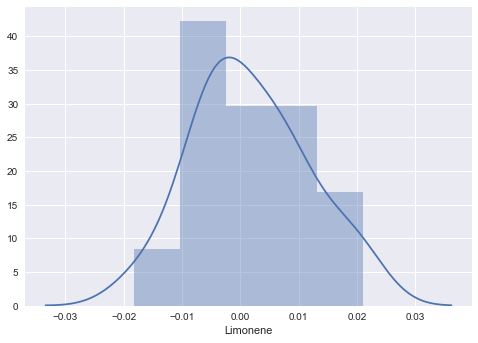

In [5]:
#Find the Final Production in each Trajectory for both the real
display(trajectory_df)

y_p = trajectory_df['Limonene'].loc[trajectory_df.index.get_level_values(1)==69]
y = test_df['states']['Limonene'].loc[trajectory_df.index.get_level_values(1)==69]
y_err = y-y_p

sns.distplot(y_err)
plt.show()

Finally We Plot the PCA with production predictions overlayed onto the data to demonstrate that there is a relationship that can be determined between the PCA and production. 

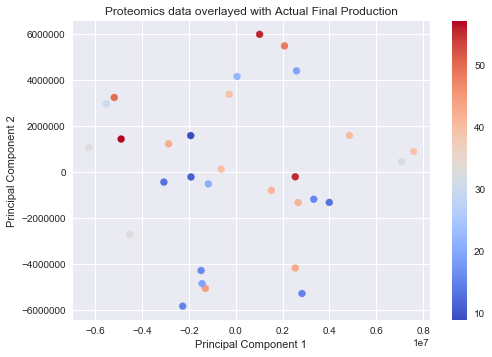

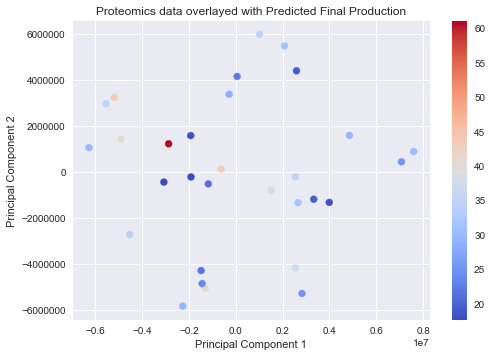

In [6]:
#Plot PCA overlayed onto Predictions
X = test_df['controls'].loc[trajectory_df.index.get_level_values(1)==69]
pca = PCA(2)
X_pca = np.transpose(pca.fit_transform(X)).tolist()

#Scatter Plot PCA Fit
plt.figure()
plt.scatter(*X_pca,c=y*1000,cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar()
plt.title('Proteomics data overlayed with Actual Final Production')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.figure()
plt.scatter(*X_pca,c=y_p*1000,cmap=plt.cm.get_cmap('coolwarm'))
plt.colorbar()
plt.title('Proteomics data overlayed with Predicted Final Production')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [10]:
display(trajectory_df)
trajectory_df.to_csv('FullTimeSeriesPredicted.csv')

GPPS            LS  Acetyl-CoA  Acetoacetyl-CoA   HMG-CoA  \
Strain                                                                         
40     0   8.443557e-01  4.063592e+00    0.200000         0.200000  0.200000   
       1   1.122875e+06  1.489777e+06    0.202059         0.200053  0.199726   
       2   2.274714e+06  2.679506e+06    0.204050         0.200173  0.199513   
       3   3.002875e+06  3.496040e+06    0.206019         0.200314  0.199312   
       4   3.356035e+06  3.899370e+06    0.207975         0.200469  0.199116   
       5   3.543771e+06  4.092031e+06    0.209922         0.200631  0.198919   
       6   3.666613e+06  4.214136e+06    0.211863         0.200799  0.198721   
       7   3.748684e+06  4.297270e+06    0.213799         0.200972  0.198521   
       8   3.809698e+06  4.352602e+06    0.215731         0.201149  0.198319   
       9   3.860117e+06  4.392505e+06    0.217663         0.201326  0.198116   
       10  3.898344e+06  4.424954e+06    0.219610         0.201486  0.197910   
       11  3.928910e+06  4.451847e+06    0.221554         0.201649  0.197703   
       12  3.956277e+06  4.476788e+06    0.223496         0.201814  0.197496   
       13  3.978536e+06  4.498708e+06    0.225435         0.201982  0.197288   
       14  3.996419e+06  4.516842e+06    0.227372         0.202153  0.197079   
       15  4.012015e+06  4.532807e+06    0.229307         0.202325  0.196871   
       16  4.026187e+06  4.546879e+06    0.231241         0.202500  0.196662   
       17  4.038697e+06  4.558943e+06    0.233172         0.202676  0.196453   
       18  4.049838e+06  4.570069e+06    0.235102         0.202855  0.196245   
       19  4.059871e+06  4.579959e+06    0.237030         0.203035  0.196038   
       20  4.068776e+06  4.589214e+06    0.238957         0.203217  0.195831   
       21  4.076813e+06  4.597838e+06    0.240882         0.203401  0.195624   
       22  4.084078e+06  4.606093e+06    0.242805         0.203587  0.195418   
       23  4.090657e+06  4.613933e+06    0.244728         0.203774  0.195213   
       24  4.096743e+06  4.621432e+06    0.246648         0.203963  0.195009   
       25  4.102284e+06  4.628550e+06    0.248568         0.204154  0.194806   
       26  4.107377e+06  4.635399e+06    0.250486         0.204347  0.194603   
       27  4.112221e+06  4.641968e+06    0.252402         0.204541  0.194402   
       28  4.116717e+06  4.648380e+06    0.254318         0.204736  0.194201   
       29  4.120876e+06  4.654251e+06    0.256232         0.204934  0.194001   
...                 ...           ...         ...              ...       ...   
3296   40  1.978357e+06  5.012292e+06    0.278039         0.206351  0.152732   
       41  1.979231e+06  5.016037e+06    0.279959         0.206546  0.151672   
       42  1.980099e+06  5.019680e+06    0.281878         0.206742  0.150618   
       43  1.980944e+06  5.023239e+06    0.283795         0.206939  0.149571   
       44  1.981788e+06  5.026473e+06    0.285711         0.207138  0.148530   
       45  1.982619e+06  5.029579e+06    0.287625         0.207339  0.147495   
       46  1.983410e+06  5.032400e+06    0.289539         0.207541  0.146467   
       47  1.984189e+06  5.035087e+06    0.291451         0.207744  0.145445   
       48  1.984954e+06  5.037685e+06    0.293361         0.207949  0.144428   
       49  1.985683e+06  5.040199e+06    0.295271         0.208155  0.143418   
       50  1.986380e+06  5.042420e+06    0.297179         0.208362  0.142414   
       51  1.987050e+06  5.044531e+06    0.299085         0.208571  0.141416   
       52  1.987642e+06  5.046539e+06    0.300990         0.208782  0.140424   
       53  1.988193e+06  5.048422e+06    0.302894         0.208993  0.139438   
       54  1.988730e+06  5.050298e+06    0.304797         0.209207  0.138458   
       55  1.989248e+06  5.052158e+06    0.306698         0.209421  0.137484   
       56  1.989751e+06  5.053943e+06    0.308598         0.209637  0.136515   
       57  1.990243

In [7]:
import pandas as pd
pd.concat([X,y,y_p],axis=1).to_csv('Predicted_Data2.csv')

#display(X)
#display(y)
#display(y_p)